# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2024_25_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import os
os.environ['MLP_DATA_DIR'] = '/Users/fadhilkusuma/fadhil-mlpratical/data'

In [ ]:
#Initial Code given by Instructor - Too Use and Modify as Needed

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-valid.npz' with keys: inputs, targets)


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layer - 128 Units
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
plt.show()

Note: you may need to restart the kernel to use updated packages.


NameError: name 'train_model_and_plot_stats' is not defined

# Task 1: Problem identification

Figure 1 shows the training and validation error curves in Figure 1a and also training and validation accuracies in Figure 1b for a model with 2 hidden layers1 with ReLU trained on the EMNIST dataset by using cross-entropy error function. This curve can be re-produced by running the model settings defined in the Coursework1.ipynb notebook in the github repository. We first identify and discuss the problem shown by the curves in Figure 1 as overfitting, and briefly discuss potential solutions in this section for overcoming this problem.
Varying number of hidden units. Initially you will train various 1-hidden layer networks by using either 32, 64 and 128 ReLU hidden units per layer on EMNIST. Note that 1-hidden layer network contains two layers, one mapping input units to hidden units and another one mapping hidden units to output units. 2 and 3-hidden layer networks would contain 3 and 4 layers respectively. Make sure you use Adam optimiser with the hyperparameters provided in the template and train each network for 100 epochs. Visualise and discuss how increasing number of hidden units affects the validation performance and whether it worsens or mitigates the overfitting problem.

**Varying number of layers**. Here you will train various neural networks by using either 1, 2, 3 hidden layers with 128 ReLU hidden units 
per layer on EMNIST. Make sure that you use Adam optimiser with the hyperparameters provided in the template and train each network for 100 epochs. Visualise and discuss how increasing number of layers affects the validation performance and whether it worsens or mitigates the overfitting problem.

**Varying number of layers**. Here you will train various neural networks by using either 1, 2, 3 hidden layers with 128 ReLU hidden units per layer on EMNIST. Make sure that you use Adam optimiser with the hyperparameters provided in the template and train each network for 100 epochs. Visualise and discuss how increasing number of layers affects the validation performance and whether it worsens or mitigates the overfitting problem.

In [5]:
# Make A Function To Make Plots for Network Width
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.0009
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, [32,64,128]

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Define New Function that Runs on the default network depth and iterates different hidden dimension units

def model_performance_diff_width(
    input_dim,output_dim,hidden_dim, learning_rule, train_data, valid_data,
    weights_init, biases_init, num_epochs, stats_interval, notebook=True):

    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])
    
    error = CrossEntropySoftmaxError()
    
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    return stats,keys

#Iteration to Initiate Function and Create Plots
stats_dictionary = {}

for hidden_dim in hidden_dim_iter:
    stats,keys = model_performance_diff_width(
        input_dim,output_dim,hidden_dim, learning_rule, train_data, valid_data,
        weights_init, biases_init, num_epochs, stats_interval)
    stats_dictionary[hidden_dim] = (stats,keys)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=1.25e+00, acc(train)=6.54e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.5s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.13e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.2s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.05e+00, acc(valid)=7.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.2s to complete
    error(train)=9.60e-01, acc(train)=7.25e-01, error(valid)=9.83e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.3s to complete
    error(train)=9.11e-01, acc(train)=7.36e-01, error(valid)=9.41e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.4s to complete
    error(train)=8.78e-01, acc(train)=7.44e-01, error(valid)=9.12e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.5s to complete
    error(train)=8.60e-01, acc(train)=7.46e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 3.0s to complete
    error(train)=8.21e-01, acc(train)=7.58e-01, error(valid)=8.60e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.5s to complete
    error(train)=8.02e-01, acc(train)=7.62e-01, error(valid)=8.43e-01, acc(valid)=7.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 3.3s to complete
    error(train)=7.83e-01, acc(train)=7.67e-01, error(valid)=8.24e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.5s to complete
    error(train)=7.64e-01, acc(train)=7.72e-01, error(valid)=8.12e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.4s to complete
    error(train)=7.47e-01, acc(train)=7.76e-01, error(valid)=7.94e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.3s to complete
    error(train)=7.37e-01, acc(train)=7.78e-01, error(valid)=7.86e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.6s to complete
    error(train)=7.31e-01, acc(train)=7.79e-01, error(valid)=7.85e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.3s to complete
    error(train)=7.20e-01, acc(train)=7.80e-01, error(valid)=7.77e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.5s to complete
    error(train)=7.12e-01, acc(train)=7.85e-01, error(valid)=7.71e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.4s to complete
    error(train)=7.05e-01, acc(train)=7.84e-01, error(valid)=7.65e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.2s to complete
    error(train)=6.92e-01, acc(train)=7.89e-01, error(valid)=7.54e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.1s to complete
    error(train)=6.88e-01, acc(train)=7.89e-01, error(valid)=7.53e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.3s to complete
    error(train)=6.90e-01, acc(train)=7.88e-01, error(valid)=7.56e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=6.77e-01, acc(train)=7.91e-01, error(valid)=7.47e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=6.76e-01, acc(train)=7.92e-01, error(valid)=7.48e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.9s to complete
    error(train)=6.68e-01, acc(train)=7.94e-01, error(valid)=7.39e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.5s to complete
    error(train)=6.70e-01, acc(train)=7.93e-01, error(valid)=7.44e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.6s to complete
    error(train)=6.60e-01, acc(train)=7.96e-01, error(valid)=7.36e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.5s to complete
    error(train)=6.59e-01, acc(train)=7.95e-01, error(valid)=7.41e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.5s to complete
    error(train)=6.53e-01, acc(train)=7.98e-01, error(valid)=7.32e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.7s to complete
    error(train)=6.45e-01, acc(train)=8.00e-01, error(valid)=7.28e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.3s to complete
    error(train)=6.52e-01, acc(train)=7.96e-01, error(valid)=7.34e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.4s to complete
    error(train)=6.44e-01, acc(train)=8.01e-01, error(valid)=7.26e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.4s to complete
    error(train)=6.39e-01, acc(train)=8.01e-01, error(valid)=7.26e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.6s to complete
    error(train)=6.36e-01, acc(train)=8.02e-01, error(valid)=7.23e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.6s to complete
    error(train)=6.36e-01, acc(train)=8.00e-01, error(valid)=7.24e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.6s to complete
    error(train)=6.34e-01, acc(train)=8.02e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.6s to complete
    error(train)=6.27e-01, acc(train)=8.05e-01, error(valid)=7.17e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.6s to complete
    error(train)=6.23e-01, acc(train)=8.05e-01, error(valid)=7.18e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.1s to complete
    error(train)=6.17e-01, acc(train)=8.08e-01, error(valid)=7.09e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.2s to complete
    error(train)=6.19e-01, acc(train)=8.06e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.7s to complete
    error(train)=6.19e-01, acc(train)=8.06e-01, error(valid)=7.20e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.1s to complete
    error(train)=6.18e-01, acc(train)=8.06e-01, error(valid)=7.18e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.4s to complete
    error(train)=6.12e-01, acc(train)=8.08e-01, error(valid)=7.14e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.1s to complete
    error(train)=6.15e-01, acc(train)=8.05e-01, error(valid)=7.18e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.2s to complete
    error(train)=6.15e-01, acc(train)=8.05e-01, error(valid)=7.13e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.9s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=7.10e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.8s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.8s to complete
    error(train)=6.05e-01, acc(train)=8.10e-01, error(valid)=7.12e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.7s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.7s to complete
    error(train)=6.00e-01, acc(train)=8.11e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.7s to complete
    error(train)=6.00e-01, acc(train)=8.10e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.6s to complete
    error(train)=6.03e-01, acc(train)=8.10e-01, error(valid)=7.10e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.9s to complete
    error(train)=5.96e-01, acc(train)=8.13e-01, error(valid)=7.06e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.6s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.6s to complete
    error(train)=5.93e-01, acc(train)=8.11e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.5s to complete
    error(train)=5.92e-01, acc(train)=8.13e-01, error(valid)=7.06e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.5s to complete
    error(train)=5.94e-01, acc(train)=8.12e-01, error(valid)=7.08e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.5s to complete
    error(train)=5.91e-01, acc(train)=8.12e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.6s to complete
    error(train)=5.87e-01, acc(train)=8.14e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.5s to complete
    error(train)=5.82e-01, acc(train)=8.16e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.5s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=7.10e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.5s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=7.01e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.6s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.6s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=6.98e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.5s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=7.03e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.5s to complete
    error(train)=5.75e-01, acc(train)=8.17e-01, error(valid)=6.95e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.5s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=6.99e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.6s to complete
    error(train)=5.83e-01, acc(train)=8.14e-01, error(valid)=7.04e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.5s to complete
    error(train)=5.73e-01, acc(train)=8.18e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.5s to complete
    error(train)=5.83e-01, acc(train)=8.15e-01, error(valid)=7.06e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.6s to complete
    error(train)=5.75e-01, acc(train)=8.17e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.4s to complete
    error(train)=5.77e-01, acc(train)=8.15e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.4s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=6.98e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.3s to complete
    error(train)=5.72e-01, acc(train)=8.18e-01, error(valid)=6.99e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.3s to complete
    error(train)=5.73e-01, acc(train)=8.17e-01, error(valid)=7.03e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.3s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=7.00e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.4s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=6.97e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.3s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.97e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.8s to complete
    error(train)=5.66e-01, acc(train)=8.19e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=5.77e-01, acc(train)=8.14e-01, error(valid)=7.11e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.5s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.0s to complete
    error(train)=5.65e-01, acc(train)=8.19e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.6s to complete
    error(train)=5.70e-01, acc(train)=8.17e-01, error(valid)=7.07e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.4s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.3s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.6s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=6.94e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.7s to complete
    error(train)=5.65e-01, acc(train)=8.21e-01, error(valid)=7.03e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.1s to complete
    error(train)=5.59e-01, acc(train)=8.22e-01, error(valid)=6.98e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.9s to complete
    error(train)=5.56e-01, acc(train)=8.22e-01, error(valid)=6.97e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.8s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=6.96e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.7s to complete
    error(train)=5.61e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.5s to complete
    error(train)=5.62e-01, acc(train)=8.21e-01, error(valid)=7.02e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.5s to complete
    error(train)=5.60e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.0s to complete
    error(train)=5.56e-01, acc(train)=8.21e-01, error(valid)=7.01e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.1s to complete
    error(train)=5.57e-01, acc(train)=8.22e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.7s to complete
    error(train)=5.58e-01, acc(train)=8.22e-01, error(valid)=7.00e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.8s to complete
    error(train)=5.54e-01, acc(train)=8.23e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.7s to complete
    error(train)=5.59e-01, acc(train)=8.21e-01, error(valid)=7.02e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.8s to complete
    error(train)=5.50e-01, acc(train)=8.25e-01, error(valid)=6.97e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.7s to complete
    error(train)=5.53e-01, acc(train)=8.23e-01, error(valid)=6.98e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.7s to complete
    error(train)=5.50e-01, acc(train)=8.24e-01, error(valid)=6.94e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.7s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=1.09e+00, acc(train)=6.95e-01, error(valid)=1.10e+00, acc(valid)=6.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.3s to complete
    error(train)=9.08e-01, acc(train)=7.42e-01, error(valid)=9.32e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.1s to complete
    error(train)=8.14e-01, acc(train)=7.63e-01, error(valid)=8.48e-01, acc(valid)=7.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.2s to complete
    error(train)=7.53e-01, acc(train)=7.73e-01, error(valid)=7.90e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.1s to complete
    error(train)=7.01e-01, acc(train)=7.88e-01, error(valid)=7.47e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.1s to complete
    error(train)=6.58e-01, acc(train)=7.99e-01, error(valid)=7.10e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.1s to complete
    error(train)=6.38e-01, acc(train)=8.04e-01, error(valid)=6.98e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.1s to complete
    error(train)=6.11e-01, acc(train)=8.11e-01, error(valid)=6.72e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.1s to complete
    error(train)=5.93e-01, acc(train)=8.16e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.1s to complete
    error(train)=5.72e-01, acc(train)=8.21e-01, error(valid)=6.46e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.1s to complete
    error(train)=5.64e-01, acc(train)=8.22e-01, error(valid)=6.40e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.1s to complete
    error(train)=5.52e-01, acc(train)=8.24e-01, error(valid)=6.35e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=5.40e-01, acc(train)=8.27e-01, error(valid)=6.32e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.0s to complete
    error(train)=5.28e-01, acc(train)=8.31e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.2s to complete
    error(train)=5.25e-01, acc(train)=8.32e-01, error(valid)=6.17e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.0s to complete
    error(train)=5.29e-01, acc(train)=8.28e-01, error(valid)=6.32e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.0s to complete
    error(train)=4.97e-01, acc(train)=8.40e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.1s to complete
    error(train)=4.91e-01, acc(train)=8.41e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.2s to complete
    error(train)=4.87e-01, acc(train)=8.42e-01, error(valid)=5.94e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.0s to complete
    error(train)=4.85e-01, acc(train)=8.44e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.1s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.3s to complete
    error(train)=4.75e-01, acc(train)=8.44e-01, error(valid)=5.92e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.93e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.8s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.87e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.0s to complete
    error(train)=4.66e-01, acc(train)=8.47e-01, error(valid)=5.93e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.2s to complete
    error(train)=4.65e-01, acc(train)=8.46e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.1s to complete
    error(train)=4.53e-01, acc(train)=8.51e-01, error(valid)=5.87e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.0s to complete
    error(train)=4.41e-01, acc(train)=8.54e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.0s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.82e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.7s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.87e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.9s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=5.81e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.2s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.5s to complete
    error(train)=4.33e-01, acc(train)=8.56e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.5s to complete
    error(train)=4.29e-01, acc(train)=8.58e-01, error(valid)=5.83e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.4s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.4s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.82e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.4s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.80e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.5s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.84e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.4s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.2s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.84e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.3s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.85e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.88e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.2s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=5.84e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.2s to complete
    error(train)=4.13e-01, acc(train)=8.61e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.2s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.85e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.3s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.88e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.87e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.7s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.94e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.8s to complete
    error(train)=4.03e-01, acc(train)=8.65e-01, error(valid)=5.97e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.9s to complete
    error(train)=3.97e-01, acc(train)=8.65e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=3.98e-01, acc(train)=8.66e-01, error(valid)=5.93e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.3s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.91e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.3s to complete
    error(train)=3.87e-01, acc(train)=8.69e-01, error(valid)=5.92e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.7s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=5.93e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.6s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.99e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.5s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.88e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.9s to complete
    error(train)=3.86e-01, acc(train)=8.67e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.4s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=5.90e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.9s to complete
    error(train)=3.82e-01, acc(train)=8.69e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.9s to complete
    error(train)=3.85e-01, acc(train)=8.69e-01, error(valid)=5.98e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.3s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.97e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.5s to complete
    error(train)=3.76e-01, acc(train)=8.72e-01, error(valid)=5.99e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.3s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=6.03e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.3s to complete
    error(train)=3.75e-01, acc(train)=8.72e-01, error(valid)=6.04e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.3s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=6.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.2s to complete
    error(train)=3.69e-01, acc(train)=8.74e-01, error(valid)=6.03e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.72e-01, error(valid)=6.07e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.08e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.1s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=6.06e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.76e-01, error(valid)=6.07e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.2s to complete
    error(train)=3.70e-01, acc(train)=8.73e-01, error(valid)=6.10e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.4s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=6.11e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.0s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=6.10e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.0s to complete
    error(train)=3.67e-01, acc(train)=8.73e-01, error(valid)=6.20e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.0s to complete
    error(train)=3.68e-01, acc(train)=8.73e-01, error(valid)=6.18e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.0s to complete
    error(train)=3.59e-01, acc(train)=8.76e-01, error(valid)=6.15e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.0s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=6.19e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.4s to complete
    error(train)=3.58e-01, acc(train)=8.78e-01, error(valid)=6.19e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.21e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.0s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=6.22e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.6s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=6.31e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.5s to complete
    error(train)=3.55e-01, acc(train)=8.79e-01, error(valid)=6.25e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.7s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=6.25e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.6s to complete
    error(train)=3.55e-01, acc(train)=8.77e-01, error(valid)=6.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 18.1s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=6.26e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 8.1s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=6.26e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.2s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=6.36e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.8s to complete
    error(train)=3.48e-01, acc(train)=8.81e-01, error(valid)=6.30e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.4s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.27e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.3s to complete
    error(train)=3.57e-01, acc(train)=8.78e-01, error(valid)=6.40e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.4s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=6.35e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.2s to complete
    error(train)=3.44e-01, acc(train)=8.83e-01, error(valid)=6.33e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=6.42e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.7s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=6.33e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.8s to complete
    error(train)=3.48e-01, acc(train)=8.78e-01, error(valid)=6.46e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.8s to complete
    error(train)=3.42e-01, acc(train)=8.82e-01, error(valid)=6.38e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.8s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.40e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.8s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=6.47e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.8s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=6.51e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.7s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=6.51e-01, acc(valid)=8.12e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.8s to complete
    error(train)=9.31e-01, acc(train)=7.33e-01, error(valid)=9.48e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.8s to complete
    error(train)=7.38e-01, acc(train)=7.80e-01, error(valid)=7.70e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.8s to complete
    error(train)=6.29e-01, acc(train)=8.08e-01, error(valid)=6.68e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.9s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.7s to complete
    error(train)=4.95e-01, acc(train)=8.39e-01, error(valid)=5.62e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.9s to complete
    error(train)=4.70e-01, acc(train)=8.46e-01, error(valid)=5.51e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.9s to complete
    error(train)=4.49e-01, acc(train)=8.54e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.8s to complete
    error(train)=4.32e-01, acc(train)=8.59e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.25e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.9s to complete
    error(train)=4.03e-01, acc(train)=8.64e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.9s to complete
    error(train)=3.91e-01, acc(train)=8.68e-01, error(valid)=5.18e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.9s to complete
    error(train)=3.83e-01, acc(train)=8.70e-01, error(valid)=5.20e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.8s to complete
    error(train)=3.77e-01, acc(train)=8.72e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.20e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.0s to complete
    error(train)=3.50e-01, acc(train)=8.80e-01, error(valid)=5.24e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.9s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.2s to complete
    error(train)=3.30e-01, acc(train)=8.88e-01, error(valid)=5.19e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.9s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.1s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.21e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.4s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.8s to complete
    error(train)=3.15e-01, acc(train)=8.89e-01, error(valid)=5.35e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 9.2s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.6s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.43e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.0s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.0s to complete
    error(train)=2.96e-01, acc(train)=8.95e-01, error(valid)=5.49e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.4s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=5.56e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.4s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=5.53e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.2s to complete
    error(train)=2.83e-01, acc(train)=8.98e-01, error(valid)=5.50e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.7s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=5.62e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 5.6s to complete
    error(train)=2.73e-01, acc(train)=9.03e-01, error(valid)=5.60e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.0s to complete
    error(train)=2.70e-01, acc(train)=9.04e-01, error(valid)=5.62e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.2s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=5.74e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.1s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=5.71e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.7s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=5.83e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.7s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=5.87e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.7s to complete
    error(train)=2.56e-01, acc(train)=9.09e-01, error(valid)=5.90e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.6s to complete
    error(train)=2.49e-01, acc(train)=9.11e-01, error(valid)=5.84e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.6s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=5.92e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.4s to complete
    error(train)=2.45e-01, acc(train)=9.12e-01, error(valid)=5.96e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.6s to complete
    error(train)=2.47e-01, acc(train)=9.11e-01, error(valid)=5.99e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.6s to complete
    error(train)=2.46e-01, acc(train)=9.10e-01, error(valid)=6.10e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.4s to complete
    error(train)=2.49e-01, acc(train)=9.11e-01, error(valid)=6.23e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.4s to complete
    error(train)=2.41e-01, acc(train)=9.11e-01, error(valid)=6.21e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.3s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=6.25e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.2s to complete
    error(train)=2.41e-01, acc(train)=9.12e-01, error(valid)=6.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.3s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=6.33e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.2s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.39e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.3s to complete
    error(train)=2.31e-01, acc(train)=9.16e-01, error(valid)=6.47e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.1s to complete
    error(train)=2.29e-01, acc(train)=9.17e-01, error(valid)=6.52e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.1s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=6.56e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.3s to complete
    error(train)=2.23e-01, acc(train)=9.19e-01, error(valid)=6.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.9s to complete
    error(train)=2.19e-01, acc(train)=9.20e-01, error(valid)=6.66e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.1s to complete
    error(train)=2.19e-01, acc(train)=9.20e-01, error(valid)=6.63e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.1s to complete
    error(train)=2.19e-01, acc(train)=9.19e-01, error(valid)=6.72e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.1s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=6.80e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.1s to complete
    error(train)=2.17e-01, acc(train)=9.20e-01, error(valid)=6.84e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.1s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=6.95e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.4s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=6.96e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.3s to complete
    error(train)=2.12e-01, acc(train)=9.21e-01, error(valid)=7.07e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.1s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=7.18e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.0s to complete
    error(train)=2.03e-01, acc(train)=9.25e-01, error(valid)=7.07e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.4s to complete
    error(train)=2.03e-01, acc(train)=9.25e-01, error(valid)=7.09e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.2s to complete
    error(train)=2.14e-01, acc(train)=9.19e-01, error(valid)=7.25e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.3s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=7.32e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=2.02e-01, acc(train)=9.23e-01, error(valid)=7.36e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.4s to complete
    error(train)=2.23e-01, acc(train)=9.14e-01, error(valid)=7.65e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.3s to complete
    error(train)=1.97e-01, acc(train)=9.28e-01, error(valid)=7.36e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.4s to complete
    error(train)=2.01e-01, acc(train)=9.25e-01, error(valid)=7.43e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=1.99e-01, acc(train)=9.26e-01, error(valid)=7.59e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.3s to complete
    error(train)=2.00e-01, acc(train)=9.25e-01, error(valid)=7.60e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=7.71e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.6s to complete
    error(train)=1.94e-01, acc(train)=9.26e-01, error(valid)=7.74e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.4s to complete
    error(train)=1.93e-01, acc(train)=9.29e-01, error(valid)=7.81e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.6s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=7.76e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.7s to complete
    error(train)=1.84e-01, acc(train)=9.31e-01, error(valid)=7.79e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.4s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=7.84e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.5s to complete
    error(train)=1.79e-01, acc(train)=9.34e-01, error(valid)=7.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.4s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=8.01e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.3s to complete
    error(train)=1.81e-01, acc(train)=9.33e-01, error(valid)=8.04e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.1s to complete
    error(train)=1.77e-01, acc(train)=9.34e-01, error(valid)=8.10e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.6s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.18e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 5.9s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=8.26e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 6.0s to complete
    error(train)=1.84e-01, acc(train)=9.29e-01, error(valid)=8.46e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.7s to complete
    error(train)=1.82e-01, acc(train)=9.30e-01, error(valid)=8.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 7.3s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=8.50e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.9s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=8.50e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.61e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.2s to complete
    error(train)=1.71e-01, acc(train)=9.36e-01, error(valid)=8.67e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 5.3s to complete
    error(train)=1.70e-01, acc(train)=9.36e-01, error(valid)=8.67e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.9s to complete
    error(train)=1.74e-01, acc(train)=9.34e-01, error(valid)=8.76e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.4s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=8.79e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.7s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=8.89e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.1s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.85e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.4s to complete
    error(train)=1.61e-01, acc(train)=9.39e-01, error(valid)=8.82e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.7s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=9.04e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=1.60e-01, acc(train)=9.40e-01, error(valid)=9.06e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.4s to complete
    error(train)=1.64e-01, acc(train)=9.39e-01, error(valid)=9.14e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.1s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=9.08e-01, acc(valid)=8.05e-01


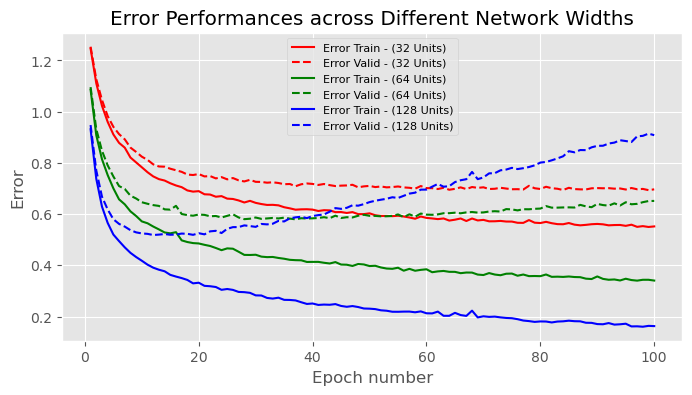

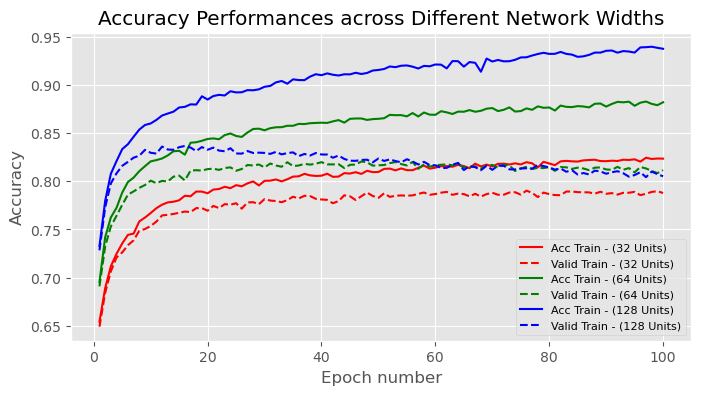

In [26]:
#Plotting Performances for Varying Network Widths

colors = ['red','green','blue']

fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for idx,(hidden_dim,(stats,keys)) in enumerate(stats_dictionary.items()):
    color = colors[idx]
    
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['error(train)']],linestyle='-',color = color , label=f"Error Train - ({hidden_dim} Units)")
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['error(valid)']],linestyle='--',color = color , label=f"Error Valid - ({hidden_dim} Units)")
    
ax_1.legend(loc='best',fontsize = 8)
ax_1.set_xlabel('Epoch number')
ax_1.set_ylabel('Error')
ax_1.set_title('Error Performances across Different Network Widths')
fig_1.savefig('Plotting_Error_Width2.svg',format = 'svg')

fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)

for idx,(hidden_dim,(stats,keys)) in enumerate(stats_dictionary.items()):
    color = colors[idx]
    
    ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['acc(train)']],linestyle='-',color = color , label=f"Acc Train - ({hidden_dim} Units)")
    ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['acc(valid)']],linestyle='--',color = color , label=f"Valid Train - ({hidden_dim} Units)")
    
ax_2.legend(loc='best',fontsize = 8)
ax_2.set_xlabel('Epoch number')
ax_2.set_ylabel('Accuracy')
ax_2.set_title('Accuracy Performances across Different Network Widths')
fig_2.savefig('Plotting_Accuracy_Width2.svg',format = 'svg')
plt.show()

In [7]:
#Print Summary Tables Varying Performances for Network Width
#!pip install pandas
import pandas as pd

summary_data_100 = []

for hidden_dim,(stats,keys) in stats_dictionary.items():
    accuracy = stats[99,keys['acc(valid)']]*100
    train_error = stats[99,keys['error(train)']]
    val_error = stats[99,keys['error(valid)']]
    summary_data_100.append({
        '#Hidden Units' : hidden_dim,
        'Val. Acc.' : accuracy,
        'Train Error' : train_error,
        'Val. Error' : val_error,
    })

summary_df = pd.DataFrame(summary_data_100)
summary_df

,#Hidden Units,Val. Acc.,Train Error,Val. Error
0,32,78.974684,0.549791,0.693600
1,64,80.854430,0.343542,0.651068
2,128,80.746835,0.163547,0.914274


In [8]:
# Make A Function To Make Plots for Network Depth
# Setup hyperparameters
learning_rate = 0.0009
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Model Definitions - 128 Units for 1,2,3 Hidden Layers
base_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

model_2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

model_3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

#Define Function to Compute and Save Statistics only, plotting done later to accommodate stacked performances across diff. network depths

def model_performance_diff_depth(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):

    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    
    return stats, keys, run_time

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.9s to complete
    error(train)=9.36e-01, acc(train)=7.33e-01, error(valid)=9.53e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.1s to complete
    error(train)=7.20e-01, acc(train)=7.87e-01, error(valid)=7.48e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.0s to complete
    error(train)=6.22e-01, acc(train)=8.10e-01, error(valid)=6.61e-01, acc(valid)=7.97e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.8s to complete
    error(train)=5.64e-01, acc(train)=8.23e-01, error(valid)=6.15e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.7s to complete
    error(train)=5.19e-01, acc(train)=8.36e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.9s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=5.67e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.8s to complete
    error(train)=4.75e-01, acc(train)=8.48e-01, error(valid)=5.61e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.8s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=5.38e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.8s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.36e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.8s to complete
    error(train)=4.18e-01, acc(train)=8.61e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.9s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.8s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.8s to complete
    error(train)=3.83e-01, acc(train)=8.71e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.8s to complete
    error(train)=3.79e-01, acc(train)=8.71e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.8s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.9s to complete
    error(train)=3.63e-01, acc(train)=8.77e-01, error(valid)=5.31e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.0s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=5.24e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.1s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=5.26e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.3s to complete
    error(train)=3.41e-01, acc(train)=8.83e-01, error(valid)=5.33e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.1s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.41e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.2s to complete
    error(train)=3.32e-01, acc(train)=8.84e-01, error(valid)=5.40e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.2s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.39e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.3s to complete
    error(train)=3.16e-01, acc(train)=8.89e-01, error(valid)=5.39e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.1s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=5.40e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.2s to complete
    error(train)=3.04e-01, acc(train)=8.93e-01, error(valid)=5.39e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.3s to complete
    error(train)=3.07e-01, acc(train)=8.93e-01, error(valid)=5.53e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.2s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.56e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.3s to complete
    error(train)=3.02e-01, acc(train)=8.94e-01, error(valid)=5.66e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.2s to complete
    error(train)=2.93e-01, acc(train)=8.96e-01, error(valid)=5.59e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.6s to complete
    error(train)=2.86e-01, acc(train)=8.99e-01, error(valid)=5.61e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.8s to complete
    error(train)=2.82e-01, acc(train)=9.00e-01, error(valid)=5.63e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.4s to complete
    error(train)=2.82e-01, acc(train)=8.99e-01, error(valid)=5.72e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.5s to complete
    error(train)=2.71e-01, acc(train)=9.05e-01, error(valid)=5.70e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 7.1s to complete
    error(train)=2.72e-01, acc(train)=9.04e-01, error(valid)=5.81e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.9s to complete
    error(train)=2.70e-01, acc(train)=9.04e-01, error(valid)=5.78e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.5s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=5.93e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.6s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=5.95e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.2s to complete
    error(train)=2.68e-01, acc(train)=9.04e-01, error(valid)=5.99e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.7s to complete
    error(train)=2.59e-01, acc(train)=9.08e-01, error(valid)=5.96e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.6s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=6.06e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=6.08e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.7s to complete
    error(train)=2.47e-01, acc(train)=9.11e-01, error(valid)=6.12e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.4s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=6.25e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=2.50e-01, acc(train)=9.11e-01, error(valid)=6.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.2s to complete
    error(train)=2.57e-01, acc(train)=9.05e-01, error(valid)=6.44e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.6s to complete
    error(train)=2.39e-01, acc(train)=9.14e-01, error(valid)=6.23e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.5s to complete
    error(train)=2.35e-01, acc(train)=9.16e-01, error(valid)=6.31e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.1s to complete
    error(train)=2.37e-01, acc(train)=9.13e-01, error(valid)=6.41e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.4s to complete
    error(train)=2.33e-01, acc(train)=9.17e-01, error(valid)=6.41e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.5s to complete
    error(train)=2.30e-01, acc(train)=9.17e-01, error(valid)=6.46e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.5s to complete
    error(train)=2.34e-01, acc(train)=9.14e-01, error(valid)=6.57e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.8s to complete
    error(train)=2.28e-01, acc(train)=9.16e-01, error(valid)=6.63e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.1s to complete
    error(train)=2.31e-01, acc(train)=9.16e-01, error(valid)=6.72e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.9s to complete
    error(train)=2.25e-01, acc(train)=9.17e-01, error(valid)=6.68e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.5s to complete
    error(train)=2.21e-01, acc(train)=9.20e-01, error(valid)=6.74e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.6s to complete
    error(train)=2.21e-01, acc(train)=9.20e-01, error(valid)=6.81e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.4s to complete
    error(train)=2.27e-01, acc(train)=9.16e-01, error(valid)=6.93e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.3s to complete
    error(train)=2.23e-01, acc(train)=9.17e-01, error(valid)=7.01e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.3s to complete
    error(train)=2.16e-01, acc(train)=9.21e-01, error(valid)=7.03e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.2s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=7.05e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.6s to complete
    error(train)=2.18e-01, acc(train)=9.19e-01, error(valid)=7.14e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.8s to complete
    error(train)=2.13e-01, acc(train)=9.22e-01, error(valid)=7.15e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.8s to complete
    error(train)=2.08e-01, acc(train)=9.24e-01, error(valid)=7.17e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 5.0s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=7.22e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.1s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=7.33e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 5.1s to complete
    error(train)=2.09e-01, acc(train)=9.21e-01, error(valid)=7.44e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.7s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=7.50e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 5.0s to complete
    error(train)=2.05e-01, acc(train)=9.24e-01, error(valid)=7.42e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.7s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=7.52e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.0s to complete
    error(train)=1.95e-01, acc(train)=9.28e-01, error(valid)=7.49e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.5s to complete
    error(train)=1.97e-01, acc(train)=9.26e-01, error(valid)=7.56e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.6s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=7.64e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.2s to complete
    error(train)=2.07e-01, acc(train)=9.21e-01, error(valid)=7.88e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.9s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.74e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.9s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.85e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.9s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=7.87e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.8s to complete
    error(train)=1.85e-01, acc(train)=9.31e-01, error(valid)=7.93e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 5.4s to complete
    error(train)=1.95e-01, acc(train)=9.26e-01, error(valid)=8.11e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.0s to complete
    error(train)=1.88e-01, acc(train)=9.30e-01, error(valid)=8.01e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.5s to complete
    error(train)=1.94e-01, acc(train)=9.25e-01, error(valid)=8.24e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.4s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=8.20e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.3s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=8.17e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.3s to complete
    error(train)=1.77e-01, acc(train)=9.35e-01, error(valid)=8.19e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.3s to complete
    error(train)=1.79e-01, acc(train)=9.34e-01, error(valid)=8.34e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.3s to complete
    error(train)=1.80e-01, acc(train)=9.32e-01, error(valid)=8.43e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.4s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=8.48e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.3s to complete
    error(train)=1.74e-01, acc(train)=9.36e-01, error(valid)=8.43e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.6s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=8.64e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.3s to complete
    error(train)=1.75e-01, acc(train)=9.35e-01, error(valid)=8.61e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.4s to complete
    error(train)=1.82e-01, acc(train)=9.29e-01, error(valid)=8.75e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.3s to complete
    error(train)=1.78e-01, acc(train)=9.32e-01, error(valid)=8.84e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.3s to complete
    error(train)=1.73e-01, acc(train)=9.35e-01, error(valid)=8.73e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.2s to complete
    error(train)=1.72e-01, acc(train)=9.34e-01, error(valid)=8.90e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.4s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=8.92e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.7s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=8.92e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.0s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=8.99e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.7s to complete
    error(train)=1.66e-01, acc(train)=9.38e-01, error(valid)=9.09e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.1s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=9.10e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.1s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=9.30e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.7s to complete
    error(train)=1.71e-01, acc(train)=9.35e-01, error(valid)=9.30e-01, acc(valid)=8.02e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.4s to complete
    error(train)=7.84e-01, acc(train)=7.62e-01, error(valid)=8.05e-01, acc(valid)=7.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.4s to complete
    error(train)=6.06e-01, acc(train)=8.07e-01, error(valid)=6.48e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.4s to complete
    error(train)=5.41e-01, acc(train)=8.18e-01, error(valid)=5.97e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.5s to complete
    error(train)=4.75e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.7s to complete
    error(train)=4.55e-01, acc(train)=8.48e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.2s to complete
    error(train)=4.05e-01, acc(train)=8.64e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 7.8s to complete
    error(train)=4.08e-01, acc(train)=8.57e-01, error(valid)=5.26e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.6s to complete
    error(train)=3.77e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.5s to complete
    error(train)=3.64e-01, acc(train)=8.73e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.4s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 7.5s to complete
    error(train)=3.42e-01, acc(train)=8.72e-01, error(valid)=5.13e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 7.2s to complete
    error(train)=3.23e-01, acc(train)=8.84e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.86e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=2.89e-01, acc(train)=8.95e-01, error(valid)=5.01e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.3s to complete
    error(train)=2.92e-01, acc(train)=8.94e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.6s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=5.15e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.6s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.35e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.6s to complete
    error(train)=2.59e-01, acc(train)=9.02e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.6s to complete
    error(train)=2.57e-01, acc(train)=9.01e-01, error(valid)=5.37e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.6s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.36e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.3s to complete
    error(train)=2.56e-01, acc(train)=9.02e-01, error(valid)=5.69e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.1s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=5.67e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.9s to complete
    error(train)=2.33e-01, acc(train)=9.09e-01, error(valid)=5.72e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=2.28e-01, acc(train)=9.12e-01, error(valid)=5.77e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.1s to complete
    error(train)=2.26e-01, acc(train)=9.12e-01, error(valid)=5.83e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 5.5s to complete
    error(train)=2.22e-01, acc(train)=9.14e-01, error(valid)=6.06e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.5s to complete
    error(train)=2.27e-01, acc(train)=9.11e-01, error(valid)=6.19e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.2s to complete
    error(train)=2.13e-01, acc(train)=9.17e-01, error(valid)=6.28e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.2s to complete
    error(train)=2.12e-01, acc(train)=9.17e-01, error(valid)=6.41e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 6.0s to complete
    error(train)=2.00e-01, acc(train)=9.22e-01, error(valid)=6.31e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.6s to complete
    error(train)=1.97e-01, acc(train)=9.22e-01, error(valid)=6.40e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.5s to complete
    error(train)=1.96e-01, acc(train)=9.23e-01, error(valid)=6.65e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 5.5s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=6.67e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.5s to complete
    error(train)=1.82e-01, acc(train)=9.27e-01, error(valid)=6.82e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.2s to complete
    error(train)=1.80e-01, acc(train)=9.28e-01, error(valid)=6.96e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=6.93e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.2s to complete
    error(train)=1.74e-01, acc(train)=9.30e-01, error(valid)=7.00e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.6s to complete
    error(train)=1.79e-01, acc(train)=9.29e-01, error(valid)=7.10e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.6s to complete
    error(train)=1.70e-01, acc(train)=9.32e-01, error(valid)=7.35e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.0s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=7.46e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.7s to complete
    error(train)=1.63e-01, acc(train)=9.34e-01, error(valid)=7.53e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.6s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.64e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.9s to complete
    error(train)=1.56e-01, acc(train)=9.38e-01, error(valid)=7.77e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.4s to complete
    error(train)=1.59e-01, acc(train)=9.35e-01, error(valid)=8.10e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.2s to complete
    error(train)=1.59e-01, acc(train)=9.34e-01, error(valid)=8.24e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.4s to complete
    error(train)=1.52e-01, acc(train)=9.39e-01, error(valid)=8.20e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.3s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=8.20e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.5s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.36e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.6s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=8.78e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.3s to complete
    error(train)=1.55e-01, acc(train)=9.35e-01, error(valid)=8.78e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.6s to complete
    error(train)=1.45e-01, acc(train)=9.41e-01, error(valid)=8.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.2s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=8.97e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.0s to complete
    error(train)=1.47e-01, acc(train)=9.38e-01, error(valid)=9.11e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.0s to complete
    error(train)=1.34e-01, acc(train)=9.46e-01, error(valid)=9.14e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=9.18e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.1s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=9.27e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.3s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=9.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.0s to complete
    error(train)=1.33e-01, acc(train)=9.45e-01, error(valid)=9.51e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.9s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=9.79e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.0s to complete
    error(train)=1.36e-01, acc(train)=9.44e-01, error(valid)=1.00e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.8s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.00e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.3s to complete
    error(train)=1.25e-01, acc(train)=9.49e-01, error(valid)=1.01e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.0s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.03e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.3s to complete
    error(train)=1.24e-01, acc(train)=9.50e-01, error(valid)=1.04e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.0s to complete
    error(train)=1.39e-01, acc(train)=9.44e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.9s to complete
    error(train)=1.30e-01, acc(train)=9.46e-01, error(valid)=1.09e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.1s to complete
    error(train)=1.24e-01, acc(train)=9.48e-01, error(valid)=1.07e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.2s to complete
    error(train)=1.14e-01, acc(train)=9.53e-01, error(valid)=1.07e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.3s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.09e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.3s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.13e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.4s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=1.13e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=1.18e-01, acc(train)=9.51e-01, error(valid)=1.14e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.3s to complete
    error(train)=1.12e-01, acc(train)=9.53e-01, error(valid)=1.15e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 7.7s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.17e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.8s to complete
    error(train)=1.13e-01, acc(train)=9.53e-01, error(valid)=1.16e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.7s to complete
    error(train)=1.20e-01, acc(train)=9.51e-01, error(valid)=1.18e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 6.8s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.20e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.6s to complete
    error(train)=1.08e-01, acc(train)=9.55e-01, error(valid)=1.21e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.6s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.23e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.7s to complete
    error(train)=1.16e-01, acc(train)=9.54e-01, error(valid)=1.26e+00, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.9s to complete
    error(train)=1.17e-01, acc(train)=9.52e-01, error(valid)=1.29e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.7s to complete
    error(train)=1.22e-01, acc(train)=9.49e-01, error(valid)=1.29e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.5s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.30e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.7s to complete
    error(train)=1.10e-01, acc(train)=9.54e-01, error(valid)=1.28e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.5s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.29e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 5.2s to complete
    error(train)=1.00e-01, acc(train)=9.59e-01, error(valid)=1.30e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.6s to complete
    error(train)=1.06e-01, acc(train)=9.57e-01, error(valid)=1.32e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.2s to complete
    error(train)=1.22e-01, acc(train)=9.53e-01, error(valid)=1.34e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.0s to complete
    error(train)=9.79e-02, acc(train)=9.60e-01, error(valid)=1.33e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.3s to complete
    error(train)=9.83e-02, acc(train)=9.60e-01, error(valid)=1.34e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.9s to complete
    error(train)=1.03e-01, acc(train)=9.58e-01, error(valid)=1.40e+00, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.0s to complete
    error(train)=1.02e-01, acc(train)=9.58e-01, error(valid)=1.38e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.9s to complete
    error(train)=1.08e-01, acc(train)=9.57e-01, error(valid)=1.40e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.7s to complete
    error(train)=9.52e-02, acc(train)=9.60e-01, error(valid)=1.42e+00, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.9s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.42e+00, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.1s to complete
    error(train)=9.23e-02, acc(train)=9.62e-01, error(valid)=1.39e+00, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.1s to complete
    error(train)=1.01e-01, acc(train)=9.60e-01, error(valid)=1.42e+00, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.2s to complete
    error(train)=9.57e-02, acc(train)=9.61e-01, error(valid)=1.42e+00, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.5s to complete
    error(train)=9.95e-02, acc(train)=9.59e-01, error(valid)=1.47e+00, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 5.5s to complete
    error(train)=8.98e-02, acc(train)=9.62e-01, error(valid)=1.46e+00, acc(valid)=8.16e-01


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.7s to complete
    error(train)=7.09e-01, acc(train)=7.76e-01, error(valid)=7.32e-01, acc(valid)=7.69e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.7s to complete
    error(train)=5.66e-01, acc(train)=8.19e-01, error(valid)=6.10e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.6s to complete
    error(train)=5.21e-01, acc(train)=8.26e-01, error(valid)=5.84e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.8s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=5.26e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.7s to complete
    error(train)=4.28e-01, acc(train)=8.53e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.7s to complete
    error(train)=3.85e-01, acc(train)=8.63e-01, error(valid)=4.95e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.7s to complete
    error(train)=3.57e-01, acc(train)=8.75e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.7s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.8s to complete
    error(train)=3.55e-01, acc(train)=8.72e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.7s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.8s to complete
    error(train)=3.19e-01, acc(train)=8.81e-01, error(valid)=5.17e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 5.0s to complete
    error(train)=3.01e-01, acc(train)=8.88e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.7s to complete
    error(train)=2.75e-01, acc(train)=8.96e-01, error(valid)=5.01e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.1s to complete
    error(train)=2.65e-01, acc(train)=8.99e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.9s to complete
    error(train)=2.76e-01, acc(train)=8.96e-01, error(valid)=5.48e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 5.7s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=2.45e-01, acc(train)=9.05e-01, error(valid)=5.35e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.7s to complete
    error(train)=2.53e-01, acc(train)=8.99e-01, error(valid)=5.75e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.3s to complete
    error(train)=2.40e-01, acc(train)=9.04e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 5.0s to complete
    error(train)=2.16e-01, acc(train)=9.15e-01, error(valid)=5.62e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.2s to complete
    error(train)=2.32e-01, acc(train)=9.08e-01, error(valid)=5.86e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 5.1s to complete
    error(train)=2.22e-01, acc(train)=9.12e-01, error(valid)=5.87e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.8s to complete
    error(train)=2.08e-01, acc(train)=9.16e-01, error(valid)=6.00e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.2s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.08e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.3s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.37e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.9s to complete
    error(train)=1.97e-01, acc(train)=9.20e-01, error(valid)=6.37e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.9s to complete
    error(train)=1.91e-01, acc(train)=9.22e-01, error(valid)=6.41e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 5.2s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=6.68e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 5.0s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=6.78e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.0s to complete
    error(train)=1.96e-01, acc(train)=9.19e-01, error(valid)=7.03e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.8s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=7.01e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.9s to complete
    error(train)=1.66e-01, acc(train)=9.33e-01, error(valid)=7.02e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.9s to complete
    error(train)=1.78e-01, acc(train)=9.26e-01, error(valid)=7.47e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.8s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.50e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.5s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=7.59e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.7s to complete
    error(train)=1.76e-01, acc(train)=9.28e-01, error(valid)=7.72e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.8s to complete
    error(train)=1.50e-01, acc(train)=9.37e-01, error(valid)=7.84e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.8s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=8.07e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.9s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=8.22e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.8s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.34e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.0s to complete
    error(train)=1.60e-01, acc(train)=9.34e-01, error(valid)=8.67e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.8s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=8.43e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.9s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=8.57e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.6s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.94e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.6s to complete
    error(train)=1.35e-01, acc(train)=9.43e-01, error(valid)=8.96e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.9s to complete
    error(train)=1.52e-01, acc(train)=9.38e-01, error(valid)=9.41e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.8s to complete
    error(train)=1.38e-01, acc(train)=9.42e-01, error(valid)=9.35e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.41e-01, error(valid)=9.66e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.8s to complete
    error(train)=1.37e-01, acc(train)=9.44e-01, error(valid)=9.58e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.6s to complete
    error(train)=1.57e-01, acc(train)=9.35e-01, error(valid)=1.01e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.6s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=1.01e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.5s to complete
    error(train)=1.31e-01, acc(train)=9.45e-01, error(valid)=1.00e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.5s to complete
    error(train)=1.28e-01, acc(train)=9.46e-01, error(valid)=9.99e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.8s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=1.04e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.2s to complete
    error(train)=1.34e-01, acc(train)=9.45e-01, error(valid)=1.03e+00, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.8s to complete
    error(train)=1.25e-01, acc(train)=9.48e-01, error(valid)=1.06e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.9s to complete
    error(train)=1.44e-01, acc(train)=9.42e-01, error(valid)=1.12e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.0s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=1.11e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.8s to complete
    error(train)=1.29e-01, acc(train)=9.47e-01, error(valid)=1.13e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.8s to complete
    error(train)=1.19e-01, acc(train)=9.51e-01, error(valid)=1.10e+00, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.8s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.13e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 5.3s to complete
    error(train)=1.33e-01, acc(train)=9.47e-01, error(valid)=1.14e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.8s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.16e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.7s to complete
    error(train)=1.26e-01, acc(train)=9.49e-01, error(valid)=1.18e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 5.3s to complete
    error(train)=1.23e-01, acc(train)=9.50e-01, error(valid)=1.17e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.7s to complete
    error(train)=1.25e-01, acc(train)=9.50e-01, error(valid)=1.22e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 5.1s to complete
    error(train)=1.16e-01, acc(train)=9.52e-01, error(valid)=1.20e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.8s to complete
    error(train)=1.22e-01, acc(train)=9.51e-01, error(valid)=1.23e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 5.9s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.26e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 5.9s to complete
    error(train)=1.20e-01, acc(train)=9.52e-01, error(valid)=1.27e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 5.0s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.23e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.0s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=1.30e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.4s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.32e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.9s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.30e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.7s to complete
    error(train)=1.43e-01, acc(train)=9.44e-01, error(valid)=1.35e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.7s to complete
    error(train)=1.15e-01, acc(train)=9.54e-01, error(valid)=1.33e+00, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.0s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=1.36e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.6s to complete
    error(train)=1.17e-01, acc(train)=9.54e-01, error(valid)=1.37e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.6s to complete
    error(train)=1.19e-01, acc(train)=9.53e-01, error(valid)=1.37e+00, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.6s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=1.39e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 4.8s to complete
    error(train)=1.16e-01, acc(train)=9.53e-01, error(valid)=1.39e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.6s to complete
    error(train)=1.27e-01, acc(train)=9.51e-01, error(valid)=1.49e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.9s to complete
    error(train)=1.14e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.7s to complete
    error(train)=1.23e-01, acc(train)=9.52e-01, error(valid)=1.47e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.6s to complete
    error(train)=1.26e-01, acc(train)=9.51e-01, error(valid)=1.51e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.7s to complete
    error(train)=9.62e-02, acc(train)=9.60e-01, error(valid)=1.44e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.9s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=1.55e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 5.1s to complete
    error(train)=1.32e-01, acc(train)=9.50e-01, error(valid)=1.52e+00, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.5s to complete
    error(train)=1.14e-01, acc(train)=9.56e-01, error(valid)=1.54e+00, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 5.4s to complete
    error(train)=1.07e-01, acc(train)=9.58e-01, error(valid)=1.52e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.6s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=1.58e+00, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.0s to complete
    error(train)=1.08e-01, acc(train)=9.58e-01, error(valid)=1.57e+00, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.1s to complete
    error(train)=9.61e-02, acc(train)=9.60e-01, error(valid)=1.51e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.9s to complete
    error(train)=1.20e-01, acc(train)=9.55e-01, error(valid)=1.59e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 46.8s to complete
    error(train)=1.15e-01, acc(train)=9.56e-01, error(valid)=1.60e+00, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.7s to complete
    error(train)=1.11e-01, acc(train)=9.58e-01, error(valid)=1.67e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.4s to complete
    error(train)=1.01e-01, acc(train)=9.61e-01, error(valid)=1.59e+00, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.5s to complete
    error(train)=1.06e-01, acc(train)=9.59e-01, error(valid)=1.64e+00, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.6s to complete
    error(train)=1.01e-01, acc(train)=9.61e-01, error(valid)=1.64e+00, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.4s to complete
    error(train)=1.18e-01, acc(train)=9.55e-01, error(valid)=1.64e+00, acc(valid)=8.21e-01


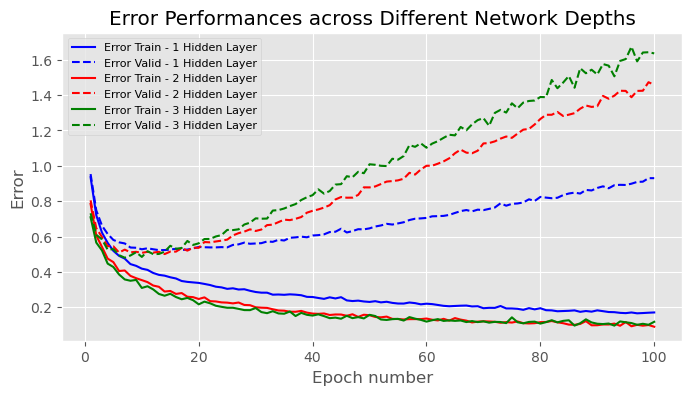

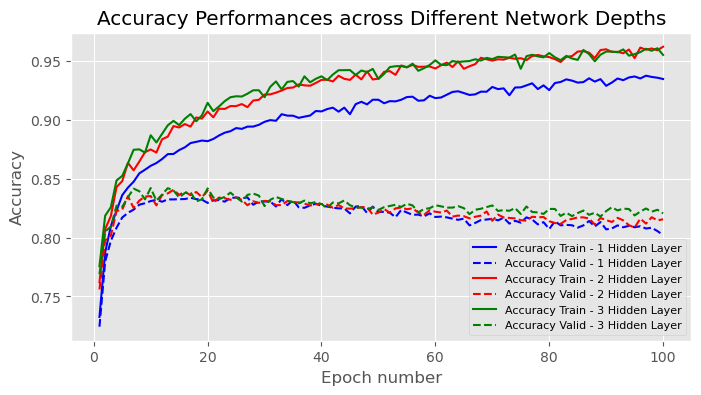

In [9]:
#Plotting Results for Varying Network Depth
model_stats ={}
for i,model in enumerate([base_model,model_2,model_3],start=1):
    stats,keys,_ = model_performance_diff_depth(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    model_stats[f'model_{i}']=(stats,keys)

colors = ['blue','red','green']
fig_3 = plt.figure(figsize=(8, 4))
ax_3 = fig_3.add_subplot(111)

for idx,(model_name,(stats,keys)) in enumerate(model_stats.items()):
    color = colors[idx]
    
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['error(train)']],linestyle='-',color = color , label=f"Error Train - {idx+1} Hidden Layer")
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['error(valid)']],linestyle='--',color = color , label=f"Error Valid - {idx+1} Hidden Layer")
    
ax_3.legend(loc='best',fontsize = 8)
ax_3.set_xlabel('Epoch number')
ax_3.set_ylabel('Error')
ax_3.set_title('Error Performances across Different Network Depths')
fig_3.savefig('Plotting_Error_Depth2.png',format = 'png')

fig_4 = plt.figure(figsize=(8, 4))
ax_4 = fig_4.add_subplot(111)

for idx,(model_name,(stats,keys)) in enumerate(model_stats.items()):
    color = colors[idx]
    
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['acc(train)']],linestyle='-',color = color , label=f"Accuracy Train - {idx+1} Hidden Layer")
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval,
              stats[1:, keys['acc(valid)']],linestyle='--',color = color , label=f"Accuracy Valid - {idx+1} Hidden Layer")
    
ax_4.legend(loc='best',fontsize = 8)
ax_4.set_xlabel('Epoch number')
ax_4.set_ylabel('Accuracy')
ax_4.set_title('Accuracy Performances across Different Network Depths')
fig_4.savefig('Plotting_Accuracy_Depth2.png',format = 'png')
plt.show()

In [27]:
fig_3.savefig('Plotting_Error_Depth2.svg',format = 'svg')
fig_4.savefig('Plotting_Accuracy_Depth2.svg',format = 'svg')

In [10]:
#Tabulated Form for 100th Epoch Results - Diff Network Depth

summary_data_100_depth = []

for model_name,(stats,keys) in model_stats.items():
    accuracy_d = stats[99,keys['acc(valid)']]*100
    train_error_d = stats[99,keys['error(train)']]
    val_error_d = stats[99,keys['error(valid)']]
    summary_data_100_depth.append({
        '#Hidden Layers' : model_name,
        'Val. Acc.' : accuracy_d,
        'Train Error' : train_error_d,
        'Val. Error' : val_error_d,
    })

summary_df_2 = pd.DataFrame(summary_data_100_depth)
summary_df_2

,#Hidden Layers,Val. Acc.,Train Error,Val. Error
0,model_1,80.563291,0.169031,0.930189
1,model_2,81.468354,0.099507,1.473073
2,model_3,82.373418,0.100873,1.642642


# Task 2: Mitigating the problem with regularization
Definition and Motivation. We provide the analysis and explanation for Dropout,L1Penalty,L2Penalty,and label smoothing in the template document, along with relevant citations.
Implementing Dropout, Weight Penalty, Label Smoothing. Here you will implement DropoutLayer, L1Penalty and L2Penalty and test their correctness. Here are the steps to follow:

1. Implement the Dropout class in the DropoutLayer of the mlp.layers module. You need to implement fprop and bprop methods for this class. Please note that the solution uses the original dropout formulation (i.e. scale the hidden unit activations by inclusion probability p in the final network for compensating missing units). The sample distribution to be used for Dropout implementation is numpy’s uniform distribution, U(0,1) to pass the unit tests.
2. Implement the L1Penalty and L2Penalty class in the L1Penalty and L2Penalty of the mlp.penalties module. You need to implement __call__ and grad methods for this class. After defining these functions, they can be provided as a parameter, weights_penalty, biases_penalty in the AffineLayer class while creating the multi-layer neural network.
3. Verify the correctness of your implementation using the supplied unit tests in
     DropoutandPenalty_tests.ipynb
4. Automatically create test outputs xxxxxx_regularization_test_pack.npy, by running the provided program scripts/generate_regularization_layer_test_outputs.py which uses your code for the previously mentioned layers to run your fprop, bprop, __call__ and grad methods where necessary for each layer on a unique test vector generated using your student ID number.

To do this part simply go to the scripts folder scripts/ and then run
python generate_regularization_layer_test_outputs.py --student_id Sxxxxxx replac- ing the ‘student id’ with your student number. A file called xxxxxxx_regularization_test_pack.npy will be generated under data which you need to submit with your report.

5. To implement the label smoothing function, fill in label_smoothing function in EMNISTDataProvider class of data_providers.py and identify when this function is called. This function must replace the
hard target 0 labels and 1 labels with α and 1 − α respectively. α must be set to 0.1. K−1
α, ift=0  K − 1 k
1 − α, if tk = 1


**EMNIST Experiments**. In this section you should modify your baseline network to one that uses DropoutLayer, L1Penalty, or L2Penalty and train a model for each case. You will also run one experiment with the baseline setup plus label smoothing, using no other regularization techniques. For the experiments, your baseline network should contain 3 hidden layers and 128 hidden units with ReLU activation function. You should use the Adam optimiser with a learning rate of 10−4 as specified in the template.

Your main aim is to i) investigate whether/how each of these functions addresses the above mentioned problem, ii) study the generalisation performance of your network when used with one of these functions, iii) discover the best possible network configuration, when the only available options to choose from are Dropout and Weight Penalty functions and the hyper-parameters (Dropout inclusion probability and penalty coefficient for the Weight Penalty functions). You should use weight penalty on both weights and biases of your layers. Otherwise, unless explicitly specified, you can leave classes’ arguments to their default values.

The Dropout inclusion probability is a float value in the range (0,1), e.g. 0.5, chosen manually. Penalty coefficient is also a manually selected float value, e.g. 0.001, usually in the range of 0.1 − 0.00001 . For model selection, you should use validation performance to pick the best model and finally report test performance of the best model.

Ensure that you thoroughly describe how these functions affect performance when used with different hyperpa- rameters in your report, ideally both at the theoretical and empirical level. When running such experiments, the expected amount of work is not a brute-force exploration of all possible variations of network configurations and hyperparameters, but a carefully designed set of experiments that provides meaningful analysis and insights. We have prespecified for what hyperparameter values you should run each individual experiment for L1/L2 regularisation and Dropout on Table 3 of the template. You should not rerun the experiments for which we provide results, but you will have to run a new experiment to get test results for the best performing model. You will have to identify and argue for a set of 8 different hyperparameter combinations for which you would have ran the combined Dropout and L1/L2 experiments. (The number 8 was not picked because there are for example 8 obvious combinations to pick or because one could not arguably run more, but rather to constraint your options and limit the amount of time put into this. There are many valid combinations of experiments to try, but you should motivate your specific selection.) You should run the label smoothing experiment without other regularization techniques.

In [11]:
# Baseline Model with Dropout Layer [3 Hidden Layers - 128 Hidden Units, ReLu), Adam 10-4

from mlp.layers import DropoutLayer
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128
inclusion_prob = 0.7

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

dropout_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob,rng=rng),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob,rng=rng),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob,rng=rng),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        dropout_model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.7s to complete
    error(train)=2.41e+00, acc(train)=4.16e-01, error(valid)=2.41e+00, acc(valid)=4.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.1s to complete
    error(train)=1.77e+00, acc(train)=5.43e-01, error(valid)=1.77e+00, acc(valid)=5.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=1.52e+00, acc(train)=5.91e-01, error(valid)=1.53e+00, acc(valid)=5.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.9s to complete
    error(train)=1.38e+00, acc(train)=6.20e-01, error(valid)=1.38e+00, acc(valid)=6.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.8s to complete
    error(train)=1.28e+00, acc(train)=6.41e-01, error(valid)=1.29e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.8s to complete
    error(train)=1.19e+00, acc(train)=6.59e-01, error(valid)=1.20e+00, acc(valid)=6.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.2s to complete
    error(train)=1.12e+00, acc(train)=6.77e-01, error(valid)=1.13e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.8s to complete
    error(train)=1.06e+00, acc(train)=6.93e-01, error(valid)=1.07e+00, acc(valid)=6.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.7s to complete
    error(train)=1.01e+00, acc(train)=7.03e-01, error(valid)=1.02e+00, acc(valid)=7.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.8s to complete
    error(train)=9.67e-01, acc(train)=7.12e-01, error(valid)=9.81e-01, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.8s to complete
    error(train)=9.30e-01, acc(train)=7.24e-01, error(valid)=9.44e-01, acc(valid)=7.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.8s to complete
    error(train)=8.95e-01, acc(train)=7.31e-01, error(valid)=9.10e-01, acc(valid)=7.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.9s to complete
    error(train)=8.64e-01, acc(train)=7.39e-01, error(valid)=8.80e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.8s to complete
    error(train)=8.46e-01, acc(train)=7.43e-01, error(valid)=8.62e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.8s to complete
    error(train)=8.17e-01, acc(train)=7.49e-01, error(valid)=8.35e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.9s to complete
    error(train)=7.95e-01, acc(train)=7.57e-01, error(valid)=8.12e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 5.5s to complete
    error(train)=7.86e-01, acc(train)=7.59e-01, error(valid)=8.03e-01, acc(valid)=7.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 5.1s to complete
    error(train)=7.59e-01, acc(train)=7.66e-01, error(valid)=7.76e-01, acc(valid)=7.61e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.8s to complete
    error(train)=7.42e-01, acc(train)=7.70e-01, error(valid)=7.60e-01, acc(valid)=7.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.8s to complete
    error(train)=7.35e-01, acc(train)=7.71e-01, error(valid)=7.54e-01, acc(valid)=7.64e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.8s to complete
    error(train)=7.17e-01, acc(train)=7.76e-01, error(valid)=7.36e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.9s to complete
    error(train)=7.09e-01, acc(train)=7.79e-01, error(valid)=7.29e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.9s to complete
    error(train)=6.97e-01, acc(train)=7.80e-01, error(valid)=7.18e-01, acc(valid)=7.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.8s to complete
    error(train)=6.87e-01, acc(train)=7.84e-01, error(valid)=7.09e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.9s to complete
    error(train)=6.82e-01, acc(train)=7.84e-01, error(valid)=7.03e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.9s to complete
    error(train)=6.68e-01, acc(train)=7.89e-01, error(valid)=6.91e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 5.1s to complete
    error(train)=6.59e-01, acc(train)=7.90e-01, error(valid)=6.82e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.9s to complete
    error(train)=6.47e-01, acc(train)=7.93e-01, error(valid)=6.71e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.8s to complete
    error(train)=6.43e-01, acc(train)=7.94e-01, error(valid)=6.68e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.8s to complete
    error(train)=6.34e-01, acc(train)=7.97e-01, error(valid)=6.59e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.8s to complete
    error(train)=6.28e-01, acc(train)=7.98e-01, error(valid)=6.54e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.9s to complete
    error(train)=6.24e-01, acc(train)=7.99e-01, error(valid)=6.51e-01, acc(valid)=7.91e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.9s to complete
    error(train)=6.17e-01, acc(train)=8.00e-01, error(valid)=6.44e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.8s to complete
    error(train)=6.07e-01, acc(train)=8.03e-01, error(valid)=6.36e-01, acc(valid)=7.95e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.9s to complete
    error(train)=6.02e-01, acc(train)=8.04e-01, error(valid)=6.31e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 5.9s to complete
    error(train)=6.01e-01, acc(train)=8.06e-01, error(valid)=6.31e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.8s to complete
    error(train)=5.97e-01, acc(train)=8.06e-01, error(valid)=6.27e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.8s to complete
    error(train)=5.91e-01, acc(train)=8.08e-01, error(valid)=6.23e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.8s to complete
    error(train)=5.84e-01, acc(train)=8.10e-01, error(valid)=6.15e-01, acc(valid)=8.02e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.8s to complete
    error(train)=5.81e-01, acc(train)=8.10e-01, error(valid)=6.12e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.9s to complete
    error(train)=5.73e-01, acc(train)=8.13e-01, error(valid)=6.06e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 5.0s to complete
    error(train)=5.69e-01, acc(train)=8.13e-01, error(valid)=6.02e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.0s to complete
    error(train)=5.65e-01, acc(train)=8.14e-01, error(valid)=5.98e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 5.9s to complete
    error(train)=5.59e-01, acc(train)=8.16e-01, error(valid)=5.92e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 5.3s to complete
    error(train)=5.55e-01, acc(train)=8.17e-01, error(valid)=5.89e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.7s to complete
    error(train)=5.53e-01, acc(train)=8.17e-01, error(valid)=5.89e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 6.1s to complete
    error(train)=5.49e-01, acc(train)=8.19e-01, error(valid)=5.85e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.8s to complete
    error(train)=5.45e-01, acc(train)=8.20e-01, error(valid)=5.80e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.1s to complete
    error(train)=5.44e-01, acc(train)=8.19e-01, error(valid)=5.83e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.8s to complete
    error(train)=5.37e-01, acc(train)=8.21e-01, error(valid)=5.75e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.1s to complete
    error(train)=5.36e-01, acc(train)=8.22e-01, error(valid)=5.76e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.7s to complete
    error(train)=5.33e-01, acc(train)=8.22e-01, error(valid)=5.72e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 5.8s to complete
    error(train)=5.29e-01, acc(train)=8.24e-01, error(valid)=5.69e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.2s to complete
    error(train)=5.25e-01, acc(train)=8.25e-01, error(valid)=5.66e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 5.9s to complete
    error(train)=5.26e-01, acc(train)=8.24e-01, error(valid)=5.67e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.7s to complete
    error(train)=5.22e-01, acc(train)=8.25e-01, error(valid)=5.65e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.3s to complete
    error(train)=5.19e-01, acc(train)=8.26e-01, error(valid)=5.61e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 7.5s to complete
    error(train)=5.14e-01, acc(train)=8.28e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 7.5s to complete
    error(train)=5.12e-01, acc(train)=8.28e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 7.8s to complete
    error(train)=5.10e-01, acc(train)=8.27e-01, error(valid)=5.53e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.7s to complete
    error(train)=5.09e-01, acc(train)=8.29e-01, error(valid)=5.53e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 15.2s to complete
    error(train)=5.05e-01, acc(train)=8.29e-01, error(valid)=5.49e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 8.7s to complete
    error(train)=5.02e-01, acc(train)=8.30e-01, error(valid)=5.48e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.3s to complete
    error(train)=5.01e-01, acc(train)=8.30e-01, error(valid)=5.47e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 10.5s to complete
    error(train)=4.98e-01, acc(train)=8.31e-01, error(valid)=5.44e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.1s to complete
    error(train)=4.97e-01, acc(train)=8.31e-01, error(valid)=5.43e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.0s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.42e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.8s to complete
    error(train)=4.94e-01, acc(train)=8.32e-01, error(valid)=5.41e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 6.2s to complete
    error(train)=4.90e-01, acc(train)=8.34e-01, error(valid)=5.39e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 6.2s to complete
    error(train)=4.89e-01, acc(train)=8.34e-01, error(valid)=5.38e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.4s to complete
    error(train)=4.86e-01, acc(train)=8.35e-01, error(valid)=5.34e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=4.83e-01, acc(train)=8.35e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 10.9s to complete
    error(train)=4.81e-01, acc(train)=8.35e-01, error(valid)=5.31e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 11.8s to complete
    error(train)=4.81e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 7.9s to complete
    error(train)=4.80e-01, acc(train)=8.36e-01, error(valid)=5.30e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 22.8s to complete
    error(train)=4.75e-01, acc(train)=8.38e-01, error(valid)=5.25e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 9.6s to complete
    error(train)=4.74e-01, acc(train)=8.38e-01, error(valid)=5.26e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.5s to complete
    error(train)=4.73e-01, acc(train)=8.38e-01, error(valid)=5.24e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 6.4s to complete
    error(train)=4.70e-01, acc(train)=8.39e-01, error(valid)=5.24e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 6.3s to complete
    error(train)=4.69e-01, acc(train)=8.39e-01, error(valid)=5.22e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 6.0s to complete
    error(train)=4.68e-01, acc(train)=8.40e-01, error(valid)=5.22e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 6.0s to complete
    error(train)=4.67e-01, acc(train)=8.39e-01, error(valid)=5.21e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.2s to complete
    error(train)=4.64e-01, acc(train)=8.41e-01, error(valid)=5.18e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.1s to complete
    error(train)=4.61e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 5.6s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=5.15e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.1s to complete
    error(train)=4.60e-01, acc(train)=8.42e-01, error(valid)=5.16e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.0s to complete
    error(train)=4.57e-01, acc(train)=8.42e-01, error(valid)=5.14e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 8.8s to complete
    error(train)=4.57e-01, acc(train)=8.43e-01, error(valid)=5.15e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 8.2s to complete
    error(train)=4.54e-01, acc(train)=8.44e-01, error(valid)=5.11e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.7s to complete
    error(train)=4.54e-01, acc(train)=8.43e-01, error(valid)=5.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 7.1s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.0s to complete
    error(train)=4.53e-01, acc(train)=8.43e-01, error(valid)=5.11e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.7s to complete
    error(train)=4.49e-01, acc(train)=8.44e-01, error(valid)=5.09e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.5s to complete
    error(train)=4.49e-01, acc(train)=8.44e-01, error(valid)=5.10e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 7.0s to complete
    error(train)=4.47e-01, acc(train)=8.45e-01, error(valid)=5.07e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 8.5s to complete
    error(train)=4.46e-01, acc(train)=8.46e-01, error(valid)=5.06e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 9.6s to complete
    error(train)=4.44e-01, acc(train)=8.46e-01, error(valid)=5.05e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 12.9s to complete
    error(train)=4.42e-01, acc(train)=8.46e-01, error(valid)=5.03e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.4s to complete
    error(train)=4.43e-01, acc(train)=8.46e-01, error(valid)=5.04e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 8.3s to complete
    error(train)=4.39e-01, acc(train)=8.47e-01, error(valid)=5.01e-01, acc(valid)=8.31e-01


In [12]:
#Performances for Dropout = 0.7
model_name = 'Dropout p=0.7'
val_acc_drop = stats[99,keys['acc(valid)']]*100
train_error_drop = stats[99,keys['error(train)']]
val_error_drop = stats[99,keys['error(valid)']]

summary_reg = [
    {
        'Model' : model_name,
        'Val. Acc' : val_acc_drop,
        'Training Error' : train_error_drop,
        'Val. Error' : val_error_drop
    }
]
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization

,Model,Val. Acc,Training Error,Val. Error
0,Dropout p=0.7,82.917722,0.443413,0.504319


In [13]:
# Baseline Model with L1 Penalty
from mlp.penalties import L1Penalty
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128
l1_penalty = 0.001

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
l1_penalty = L1Penalty(coefficient=l1_penalty)

l1penalty_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty = l1_penalty,biases_penalty = l1_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty = l1_penalty,biases_penalty = l1_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty = l1_penalty,biases_penalty = l1_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty = l1_penalty,biases_penalty = l1_penalty),
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        l1penalty_model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

stats_l1, keys_l1, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 7.4s to complete
    error(train)=1.71e+00, acc(train)=5.54e-01, error(valid)=1.71e+00, acc(valid)=5.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 7.2s to complete
    error(train)=1.54e+00, acc(train)=5.93e-01, error(valid)=1.55e+00, acc(valid)=5.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 7.1s to complete
    error(train)=1.48e+00, acc(train)=6.04e-01, error(valid)=1.48e+00, acc(valid)=6.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 6.7s to complete
    error(train)=1.43e+00, acc(train)=6.14e-01, error(valid)=1.43e+00, acc(valid)=6.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 7.1s to complete
    error(train)=1.39e+00, acc(train)=6.25e-01, error(valid)=1.39e+00, acc(valid)=6.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 7.0s to complete
    error(train)=1.36e+00, acc(train)=6.30e-01, error(valid)=1.36e+00, acc(valid)=6.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 6.6s to complete
    error(train)=1.34e+00, acc(train)=6.34e-01, error(valid)=1.34e+00, acc(valid)=6.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.6s to complete
    error(train)=1.32e+00, acc(train)=6.41e-01, error(valid)=1.32e+00, acc(valid)=6.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 24.4s to complete
    error(train)=1.30e+00, acc(train)=6.44e-01, error(valid)=1.30e+00, acc(valid)=6.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 11.6s to complete
    error(train)=1.28e+00, acc(train)=6.49e-01, error(valid)=1.28e+00, acc(valid)=6.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 9.3s to complete
    error(train)=1.26e+00, acc(train)=6.52e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.8s to complete
    error(train)=1.25e+00, acc(train)=6.55e-01, error(valid)=1.25e+00, acc(valid)=6.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 6.6s to complete
    error(train)=1.23e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.3s to complete
    error(train)=1.22e+00, acc(train)=6.61e-01, error(valid)=1.22e+00, acc(valid)=6.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 7.4s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.21e+00, acc(valid)=6.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 7.5s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.65e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 7.0s to complete
    error(train)=1.18e+00, acc(train)=6.71e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 10.6s to complete
    error(train)=1.17e+00, acc(train)=6.75e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 7.6s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.16e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.4s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.74e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 7.5s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.14e+00, acc(valid)=6.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 10.2s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.9s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 6.9s to complete
    error(train)=1.10e+00, acc(train)=6.90e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 7.4s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 7.6s to complete
    error(train)=1.08e+00, acc(train)=6.92e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


  0%|          | 0/1000 [00:01<?, ?it/s]

Epoch 27: 8.2s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 7.8s to complete
    error(train)=1.07e+00, acc(train)=6.95e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 6.7s to complete
    error(train)=1.06e+00, acc(train)=6.99e-01, error(valid)=1.07e+00, acc(valid)=6.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 7.6s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 6.6s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 8.0s to complete
    error(train)=1.04e+00, acc(train)=7.02e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 6.1s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.8s to complete
    error(train)=1.03e+00, acc(train)=7.05e-01, error(valid)=1.04e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 6.6s to complete
    error(train)=1.02e+00, acc(train)=7.07e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 6.1s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.03e+00, acc(valid)=7.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 6.8s to complete
    error(train)=1.01e+00, acc(train)=7.09e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 8.6s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 6.2s to complete
    error(train)=1.00e+00, acc(train)=7.13e-01, error(valid)=1.01e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 6.3s to complete
    error(train)=1.00e+00, acc(train)=7.12e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.6s to complete
    error(train)=9.95e-01, acc(train)=7.14e-01, error(valid)=1.01e+00, acc(valid)=7.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.7s to complete
    error(train)=9.92e-01, acc(train)=7.15e-01, error(valid)=1.00e+00, acc(valid)=7.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 9.4s to complete
    error(train)=9.86e-01, acc(train)=7.17e-01, error(valid)=9.95e-01, acc(valid)=7.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 9.8s to complete
    error(train)=9.81e-01, acc(train)=7.18e-01, error(valid)=9.92e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 6.7s to complete
    error(train)=9.78e-01, acc(train)=7.19e-01, error(valid)=9.88e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 6.9s to complete
    error(train)=9.74e-01, acc(train)=7.18e-01, error(valid)=9.84e-01, acc(valid)=7.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 7.0s to complete
    error(train)=9.71e-01, acc(train)=7.21e-01, error(valid)=9.81e-01, acc(valid)=7.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.3s to complete
    error(train)=9.68e-01, acc(train)=7.20e-01, error(valid)=9.78e-01, acc(valid)=7.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 7.4s to complete
    error(train)=9.65e-01, acc(train)=7.22e-01, error(valid)=9.75e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 7.4s to complete
    error(train)=9.59e-01, acc(train)=7.23e-01, error(valid)=9.70e-01, acc(valid)=7.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 6.7s to complete
    error(train)=9.55e-01, acc(train)=7.24e-01, error(valid)=9.65e-01, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 6.8s to complete
    error(train)=9.54e-01, acc(train)=7.25e-01, error(valid)=9.65e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 6.6s to complete
    error(train)=9.50e-01, acc(train)=7.25e-01, error(valid)=9.60e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.9s to complete
    error(train)=9.47e-01, acc(train)=7.26e-01, error(valid)=9.57e-01, acc(valid)=7.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 8.6s to complete
    error(train)=9.44e-01, acc(train)=7.26e-01, error(valid)=9.54e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 9.0s to complete
    error(train)=9.42e-01, acc(train)=7.28e-01, error(valid)=9.53e-01, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 5.9s to complete
    error(train)=9.40e-01, acc(train)=7.28e-01, error(valid)=9.50e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 6.5s to complete
    error(train)=9.37e-01, acc(train)=7.28e-01, error(valid)=9.48e-01, acc(valid)=7.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 6.5s to complete
    error(train)=9.34e-01, acc(train)=7.29e-01, error(valid)=9.44e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.9s to complete
    error(train)=9.31e-01, acc(train)=7.30e-01, error(valid)=9.42e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 7.9s to complete
    error(train)=9.28e-01, acc(train)=7.30e-01, error(valid)=9.38e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 6.7s to complete
    error(train)=9.27e-01, acc(train)=7.31e-01, error(valid)=9.39e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.9s to complete
    error(train)=9.24e-01, acc(train)=7.32e-01, error(valid)=9.35e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 8.0s to complete
    error(train)=9.23e-01, acc(train)=7.32e-01, error(valid)=9.35e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.0s to complete
    error(train)=9.19e-01, acc(train)=7.32e-01, error(valid)=9.28e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 6.5s to complete
    error(train)=9.18e-01, acc(train)=7.31e-01, error(valid)=9.29e-01, acc(valid)=7.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 6.3s to complete
    error(train)=9.16e-01, acc(train)=7.34e-01, error(valid)=9.28e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 6.9s to complete
    error(train)=9.19e-01, acc(train)=7.32e-01, error(valid)=9.30e-01, acc(valid)=7.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 9.0s to complete
    error(train)=9.14e-01, acc(train)=7.33e-01, error(valid)=9.25e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 7.7s to complete
    error(train)=9.08e-01, acc(train)=7.36e-01, error(valid)=9.19e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 6.0s to complete
    error(train)=9.09e-01, acc(train)=7.36e-01, error(valid)=9.20e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 6.2s to complete
    error(train)=9.06e-01, acc(train)=7.36e-01, error(valid)=9.17e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 5.9s to complete
    error(train)=9.04e-01, acc(train)=7.36e-01, error(valid)=9.16e-01, acc(valid)=7.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.6s to complete
    error(train)=9.06e-01, acc(train)=7.35e-01, error(valid)=9.17e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 5.9s to complete
    error(train)=9.01e-01, acc(train)=7.38e-01, error(valid)=9.10e-01, acc(valid)=7.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.0s to complete
    error(train)=8.99e-01, acc(train)=7.39e-01, error(valid)=9.09e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.9s to complete
    error(train)=9.02e-01, acc(train)=7.36e-01, error(valid)=9.14e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 7.1s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.08e-01, acc(valid)=7.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 5.6s to complete
    error(train)=8.97e-01, acc(train)=7.38e-01, error(valid)=9.09e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.5s to complete
    error(train)=8.94e-01, acc(train)=7.39e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 7.0s to complete
    error(train)=8.94e-01, acc(train)=7.38e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.7s to complete
    error(train)=8.91e-01, acc(train)=7.40e-01, error(valid)=9.01e-01, acc(valid)=7.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 6.3s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=8.99e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 7.6s to complete
    error(train)=8.89e-01, acc(train)=7.41e-01, error(valid)=8.99e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.8s to complete
    error(train)=8.86e-01, acc(train)=7.40e-01, error(valid)=8.97e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 7.9s to complete
    error(train)=8.83e-01, acc(train)=7.42e-01, error(valid)=8.93e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 9.8s to complete
    error(train)=8.83e-01, acc(train)=7.42e-01, error(valid)=8.94e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.1s to complete
    error(train)=8.82e-01, acc(train)=7.41e-01, error(valid)=8.93e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 7.8s to complete
    error(train)=8.81e-01, acc(train)=7.41e-01, error(valid)=8.91e-01, acc(valid)=7.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 7.2s to complete
    error(train)=8.78e-01, acc(train)=7.43e-01, error(valid)=8.89e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.4s to complete
    error(train)=8.78e-01, acc(train)=7.42e-01, error(valid)=8.89e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 9.2s to complete
    error(train)=8.77e-01, acc(train)=7.42e-01, error(valid)=8.88e-01, acc(valid)=7.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 5.9s to complete
    error(train)=8.76e-01, acc(train)=7.43e-01, error(valid)=8.87e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 5.3s to complete
    error(train)=8.74e-01, acc(train)=7.43e-01, error(valid)=8.85e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 5.3s to complete
    error(train)=8.73e-01, acc(train)=7.44e-01, error(valid)=8.85e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.0s to complete
    error(train)=8.71e-01, acc(train)=7.44e-01, error(valid)=8.81e-01, acc(valid)=7.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.0s to complete
    error(train)=8.70e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 6.0s to complete
    error(train)=8.69e-01, acc(train)=7.44e-01, error(valid)=8.82e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 6.2s to complete
    error(train)=8.69e-01, acc(train)=7.43e-01, error(valid)=8.80e-01, acc(valid)=7.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.6s to complete
    error(train)=8.66e-01, acc(train)=7.45e-01, error(valid)=8.78e-01, acc(valid)=7.44e-01


In [14]:
#Performances for L1Penalty
model_name_l1 = 'L1 Penalty = 1e-3'
val_acc_l1 = stats_l1[99,keys_l1['acc(valid)']]*100
train_error_l1 = stats_l1[99,keys_l1['error(train)']]
val_error_l1 = stats_l1[99,keys_l1['error(valid)']]

summary_reg.append(
    {
        'Model' : model_name_l1,
        'Val. Acc' : val_acc_l1,
        'Training Error' : train_error_l1,
        'Val. Error' : val_error_l1
    })
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization
    

,Model,Val. Acc,Training Error,Val. Error
0,Dropout p=0.7,82.917722,0.443413,0.504319
1,L1 Penalty = 1e-3,74.018987,0.869034,0.880403


In [15]:
# Baseline Model with L2 Penalty
from mlp.penalties import L2Penalty
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128
l2_penalty = 0.001

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
l2_penalty = L2Penalty(coefficient=l2_penalty)

l2penalty_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init,weights_penalty = l2_penalty,biases_penalty = l2_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty = l2_penalty,biases_penalty = l2_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init,weights_penalty = l2_penalty,biases_penalty = l2_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init,weights_penalty = l2_penalty,biases_penalty = l2_penalty),
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        l2penalty_model, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

stats_l2, keys_l2, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 5.3s to complete
    error(train)=1.36e+00, acc(train)=6.21e-01, error(valid)=1.37e+00, acc(valid)=6.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 5.0s to complete
    error(train)=1.14e+00, acc(train)=6.78e-01, error(valid)=1.15e+00, acc(valid)=6.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.8s to complete
    error(train)=1.01e+00, acc(train)=7.10e-01, error(valid)=1.02e+00, acc(valid)=7.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.7s to complete
    error(train)=9.20e-01, acc(train)=7.34e-01, error(valid)=9.31e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.3s to complete
    error(train)=8.48e-01, acc(train)=7.52e-01, error(valid)=8.60e-01, acc(valid)=7.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.6s to complete
    error(train)=7.96e-01, acc(train)=7.65e-01, error(valid)=8.10e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.3s to complete
    error(train)=7.50e-01, acc(train)=7.77e-01, error(valid)=7.67e-01, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 6.2s to complete
    error(train)=7.18e-01, acc(train)=7.83e-01, error(valid)=7.36e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 6.0s to complete
    error(train)=6.87e-01, acc(train)=7.93e-01, error(valid)=7.08e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 5.8s to complete
    error(train)=6.59e-01, acc(train)=8.00e-01, error(valid)=6.81e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 5.5s to complete
    error(train)=6.41e-01, acc(train)=8.03e-01, error(valid)=6.65e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 6.4s to complete
    error(train)=6.23e-01, acc(train)=8.08e-01, error(valid)=6.51e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.5s to complete
    error(train)=6.03e-01, acc(train)=8.15e-01, error(valid)=6.32e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 7.6s to complete
    error(train)=5.91e-01, acc(train)=8.17e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 10.6s to complete
    error(train)=5.75e-01, acc(train)=8.21e-01, error(valid)=6.07e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 18.1s to complete
    error(train)=5.63e-01, acc(train)=8.24e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 17.0s to complete
    error(train)=5.57e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 21.0s to complete
    error(train)=5.45e-01, acc(train)=8.28e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 28.1s to complete
    error(train)=5.39e-01, acc(train)=8.29e-01, error(valid)=5.75e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 21.2s to complete
    error(train)=5.30e-01, acc(train)=8.31e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 19.0s to complete
    error(train)=5.24e-01, acc(train)=8.33e-01, error(valid)=5.65e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 18.2s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.57e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 16.1s to complete
    error(train)=5.10e-01, acc(train)=8.36e-01, error(valid)=5.54e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 17.0s to complete
    error(train)=4.99e-01, acc(train)=8.42e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 18.9s to complete
    error(train)=4.99e-01, acc(train)=8.41e-01, error(valid)=5.45e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 19.7s to complete
    error(train)=4.87e-01, acc(train)=8.45e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 19.4s to complete
    error(train)=4.84e-01, acc(train)=8.45e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 18.9s to complete
    error(train)=4.77e-01, acc(train)=8.48e-01, error(valid)=5.27e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 17.7s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.30e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 20.5s to complete
    error(train)=4.72e-01, acc(train)=8.49e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 23.4s to complete
    error(train)=4.67e-01, acc(train)=8.51e-01, error(valid)=5.19e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 21.7s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.15e-01, acc(valid)=8.32e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 20.8s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.21e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 22.6s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 23.4s to complete
    error(train)=4.48e-01, acc(train)=8.55e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 22.5s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 21.5s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 20.0s to complete
    error(train)=4.42e-01, acc(train)=8.56e-01, error(valid)=5.00e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 19.6s to complete
    error(train)=4.39e-01, acc(train)=8.58e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 18.8s to complete
    error(train)=4.40e-01, acc(train)=8.55e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 19.8s to complete
    error(train)=4.40e-01, acc(train)=8.56e-01, error(valid)=4.99e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 26.6s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 26.8s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 23.0s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 21.6s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 21.5s to complete
    error(train)=4.21e-01, acc(train)=8.63e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 21.6s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=4.87e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 20.7s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=4.89e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 21.8s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 22.7s to complete
    error(train)=4.14e-01, acc(train)=8.65e-01, error(valid)=4.80e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 22.1s to complete
    error(train)=4.09e-01, acc(train)=8.67e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 20.1s to complete
    error(train)=4.09e-01, acc(train)=8.66e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 19.0s to complete
    error(train)=4.11e-01, acc(train)=8.65e-01, error(valid)=4.83e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 19.0s to complete
    error(train)=4.06e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 18.7s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 22.7s to complete
    error(train)=4.04e-01, acc(train)=8.67e-01, error(valid)=4.75e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 22.4s to complete
    error(train)=4.05e-01, acc(train)=8.67e-01, error(valid)=4.77e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 24.8s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=4.85e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 29.5s to complete
    error(train)=3.97e-01, acc(train)=8.69e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 22.8s to complete
    error(train)=3.98e-01, acc(train)=8.69e-01, error(valid)=4.73e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 20.2s to complete
    error(train)=3.98e-01, acc(train)=8.69e-01, error(valid)=4.74e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 20.9s to complete
    error(train)=3.96e-01, acc(train)=8.69e-01, error(valid)=4.70e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 21.7s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.68e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 20.1s to complete
    error(train)=3.96e-01, acc(train)=8.68e-01, error(valid)=4.73e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 20.3s to complete
    error(train)=3.94e-01, acc(train)=8.70e-01, error(valid)=4.70e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 19.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=4.70e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 19.6s to complete
    error(train)=3.88e-01, acc(train)=8.72e-01, error(valid)=4.66e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 19.7s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 27.3s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 23.6s to complete
    error(train)=3.89e-01, acc(train)=8.70e-01, error(valid)=4.69e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 18.1s to complete
    error(train)=3.87e-01, acc(train)=8.71e-01, error(valid)=4.67e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 17.2s to complete
    error(train)=3.88e-01, acc(train)=8.70e-01, error(valid)=4.67e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 28.4s to complete
    error(train)=3.85e-01, acc(train)=8.73e-01, error(valid)=4.66e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 25.1s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=4.67e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 23.4s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 22.5s to complete
    error(train)=3.81e-01, acc(train)=8.73e-01, error(valid)=4.63e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 20.7s to complete
    error(train)=3.80e-01, acc(train)=8.74e-01, error(valid)=4.62e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 21.2s to complete
    error(train)=3.82e-01, acc(train)=8.72e-01, error(valid)=4.65e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 20.9s to complete
    error(train)=3.77e-01, acc(train)=8.75e-01, error(valid)=4.62e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 21.7s to complete
    error(train)=3.75e-01, acc(train)=8.76e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 22.7s to complete
    error(train)=3.78e-01, acc(train)=8.74e-01, error(valid)=4.62e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 24.2s to complete
    error(train)=3.76e-01, acc(train)=8.74e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 22.6s to complete
    error(train)=3.73e-01, acc(train)=8.76e-01, error(valid)=4.60e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 21.1s to complete
    error(train)=3.74e-01, acc(train)=8.76e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 22.3s to complete
    error(train)=3.76e-01, acc(train)=8.75e-01, error(valid)=4.64e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 22.2s to complete
    error(train)=3.74e-01, acc(train)=8.75e-01, error(valid)=4.61e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 21.4s to complete
    error(train)=3.70e-01, acc(train)=8.76e-01, error(valid)=4.56e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 20.2s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.55e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 19.9s to complete
    error(train)=3.69e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 27.0s to complete
    error(train)=3.72e-01, acc(train)=8.75e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 22.8s to complete
    error(train)=3.64e-01, acc(train)=8.79e-01, error(valid)=4.53e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 24.5s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 24.8s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 25.1s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 21.7s to complete
    error(train)=3.66e-01, acc(train)=8.78e-01, error(valid)=4.57e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 18.5s to complete
    error(train)=3.68e-01, acc(train)=8.77e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 17.9s to complete
    error(train)=3.67e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 18.6s to complete
    error(train)=3.65e-01, acc(train)=8.78e-01, error(valid)=4.58e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 18.0s to complete
    error(train)=3.62e-01, acc(train)=8.79e-01, error(valid)=4.50e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 18.2s to complete
    error(train)=3.60e-01, acc(train)=8.80e-01, error(valid)=4.50e-01, acc(valid)=8.49e-01


In [16]:
#Performances for L2Penalty
model_name_l2 = 'L2 Penalty = 1e-3'
val_acc_l2 = stats_l2[99,keys_l2['acc(valid)']]*100
train_error_l2 = stats_l2[99,keys_l2['error(train)']]
val_error_l2 = stats_l2[99,keys_l2['error(valid)']]

summary_reg.append(
    {
        'Model' : model_name_l2,
        'Val. Acc' : val_acc_l2,
        'Training Error' : train_error_l2,
        'Val. Error' : val_error_l2
    })
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization

,Model,Val. Acc,Training Error,Val. Error
0,Dropout p=0.7,82.917722,0.443413,0.504319
1,L1 Penalty = 1e-3,74.018987,0.869034,0.880403
2,L2 Penalty = 1e-3,85.158228,0.361651,0.450371


In [17]:
# Baseline Model with Label Smoothing - Scrapped because wrong usage of smoothing for valid data

#Define New Datasets Using the Label Smoothing Argument
train_data_smooth = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels = True)
valid_data_smooth = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng,smooth_labels = True)
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

smooth_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        smooth_model, error, learning_rule, train_data_smooth, valid_data_smooth, data_monitors, notebook=True)

stats_smooth, keys_smooth, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.8s to complete
    error(train)=1.88e+00, acc(train)=6.39e-01, error(valid)=1.89e+00, acc(valid)=6.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 6.3s to complete
    error(train)=1.71e+00, acc(train)=6.93e-01, error(valid)=1.72e+00, acc(valid)=6.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 5.0s to complete
    error(train)=1.61e+00, acc(train)=7.25e-01, error(valid)=1.62e+00, acc(valid)=7.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 5.1s to complete
    error(train)=1.54e+00, acc(train)=7.51e-01, error(valid)=1.55e+00, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 5.1s to complete
    error(train)=1.48e+00, acc(train)=7.66e-01, error(valid)=1.50e+00, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 5.1s to complete
    error(train)=1.43e+00, acc(train)=7.82e-01, error(valid)=1.45e+00, acc(valid)=7.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 5.3s to complete
    error(train)=1.40e+00, acc(train)=7.90e-01, error(valid)=1.42e+00, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
#Performances for Label Smoothing - Scrapped because wrong usage of smoothing for valid data
model_name_smooth = 'Label Smoothing, alpha = 0.1'
val_acc_smooth = stats_smooth[99,keys_smooth['acc(valid)']]*100
train_error_smooth = stats_smooth[99,keys_smooth['error(train)']]
val_error_smooth = stats_smooth[99,keys_smooth['error(valid)']]

summary_reg.append(
    {
        'Model' : model_name_smooth,
        'Val. Acc' : val_acc_smooth,
        'Training Error' : train_error_smooth,
        'Val. Error' : val_error_smooth
    })
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization

In [22]:
# Baseline Model with Label Smoothing for Train Only

#Define New Datasets Using the Label Smoothing Argument
train_data_smooth = EMNISTDataProvider('train', batch_size=batch_size, rng=rng,smooth_labels = True)
valid_data_smooth2 = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

smooth_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        smooth_model, error, learning_rule, train_data_smooth, valid_data_smooth2, data_monitors, notebook=True)

stats_smooth2, keys_smooth2, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.8s to complete
    error(train)=1.89e+00, acc(train)=6.37e-01, error(valid)=1.42e+00, acc(valid)=6.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 3.5s to complete
    error(train)=1.71e+00, acc(train)=6.93e-01, error(valid)=1.20e+00, acc(valid)=6.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 10.1s to complete
    error(train)=1.60e+00, acc(train)=7.27e-01, error(valid)=1.08e+00, acc(valid)=7.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 10.9s to complete
    error(train)=1.53e+00, acc(train)=7.50e-01, error(valid)=9.97e-01, acc(valid)=7.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 8.9s to complete
    error(train)=1.48e+00, acc(train)=7.67e-01, error(valid)=9.33e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 8.3s to complete
    error(train)=1.43e+00, acc(train)=7.80e-01, error(valid)=8.87e-01, acc(valid)=7.72e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 8.0s to complete
    error(train)=1.40e+00, acc(train)=7.91e-01, error(valid)=8.48e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 8.8s to complete
    error(train)=1.37e+00, acc(train)=7.99e-01, error(valid)=8.19e-01, acc(valid)=7.90e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 5.3s to complete
    error(train)=1.34e+00, acc(train)=8.08e-01, error(valid)=7.96e-01, acc(valid)=7.98e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.4s to complete
    error(train)=1.33e+00, acc(train)=8.14e-01, error(valid)=7.73e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.4s to complete
    error(train)=1.31e+00, acc(train)=8.18e-01, error(valid)=7.55e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.7s to complete
    error(train)=1.30e+00, acc(train)=8.21e-01, error(valid)=7.41e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 5.1s to complete
    error(train)=1.28e+00, acc(train)=8.27e-01, error(valid)=7.24e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 5.4s to complete
    error(train)=1.27e+00, acc(train)=8.29e-01, error(valid)=7.17e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.5s to complete
    error(train)=1.26e+00, acc(train)=8.32e-01, error(valid)=7.01e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.6s to complete
    error(train)=1.25e+00, acc(train)=8.36e-01, error(valid)=6.95e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.8s to complete
    error(train)=1.24e+00, acc(train)=8.38e-01, error(valid)=6.82e-01, acc(valid)=8.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.7s to complete
    error(train)=1.23e+00, acc(train)=8.42e-01, error(valid)=6.77e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 5.1s to complete
    error(train)=1.22e+00, acc(train)=8.43e-01, error(valid)=6.69e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 7.0s to complete
    error(train)=1.21e+00, acc(train)=8.45e-01, error(valid)=6.67e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 5.1s to complete
    error(train)=1.21e+00, acc(train)=8.48e-01, error(valid)=6.55e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.6s to complete
    error(train)=1.20e+00, acc(train)=8.50e-01, error(valid)=6.53e-01, acc(valid)=8.34e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 6.4s to complete
    error(train)=1.19e+00, acc(train)=8.52e-01, error(valid)=6.45e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 5.2s to complete
    error(train)=1.19e+00, acc(train)=8.53e-01, error(valid)=6.45e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 5.3s to complete
    error(train)=1.18e+00, acc(train)=8.54e-01, error(valid)=6.43e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.7s to complete
    error(train)=1.18e+00, acc(train)=8.55e-01, error(valid)=6.38e-01, acc(valid)=8.35e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.9s to complete
    error(train)=1.17e+00, acc(train)=8.57e-01, error(valid)=6.33e-01, acc(valid)=8.38e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.8s to complete
    error(train)=1.17e+00, acc(train)=8.59e-01, error(valid)=6.31e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.9s to complete
    error(train)=1.16e+00, acc(train)=8.61e-01, error(valid)=6.25e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 5.0s to complete
    error(train)=1.16e+00, acc(train)=8.60e-01, error(valid)=6.22e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 5.8s to complete
    error(train)=1.15e+00, acc(train)=8.63e-01, error(valid)=6.19e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.9s to complete
    error(train)=1.15e+00, acc(train)=8.62e-01, error(valid)=6.18e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.9s to complete
    error(train)=1.15e+00, acc(train)=8.65e-01, error(valid)=6.13e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 5.1s to complete
    error(train)=1.14e+00, acc(train)=8.68e-01, error(valid)=6.14e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 5.1s to complete
    error(train)=1.14e+00, acc(train)=8.68e-01, error(valid)=6.17e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 7.2s to complete
    error(train)=1.14e+00, acc(train)=8.69e-01, error(valid)=6.10e-01, acc(valid)=8.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 5.9s to complete
    error(train)=1.13e+00, acc(train)=8.69e-01, error(valid)=6.07e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 5.9s to complete
    error(train)=1.13e+00, acc(train)=8.71e-01, error(valid)=6.00e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 5.0s to complete
    error(train)=1.13e+00, acc(train)=8.72e-01, error(valid)=6.01e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 5.7s to complete
    error(train)=1.12e+00, acc(train)=8.73e-01, error(valid)=6.01e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 6.1s to complete
    error(train)=1.12e+00, acc(train)=8.74e-01, error(valid)=6.01e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.4s to complete
    error(train)=1.12e+00, acc(train)=8.75e-01, error(valid)=5.95e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 5.8s to complete
    error(train)=1.12e+00, acc(train)=8.75e-01, error(valid)=5.95e-01, acc(valid)=8.44e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 6.3s to complete
    error(train)=1.12e+00, acc(train)=8.74e-01, error(valid)=5.98e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 7.2s to complete
    error(train)=1.11e+00, acc(train)=8.77e-01, error(valid)=5.90e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 5.9s to complete
    error(train)=1.11e+00, acc(train)=8.77e-01, error(valid)=5.88e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 8.2s to complete
    error(train)=1.10e+00, acc(train)=8.80e-01, error(valid)=5.85e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 5.2s to complete
    error(train)=1.10e+00, acc(train)=8.78e-01, error(valid)=5.84e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 6.6s to complete
    error(train)=1.10e+00, acc(train)=8.81e-01, error(valid)=5.84e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 6.3s to complete
    error(train)=1.10e+00, acc(train)=8.82e-01, error(valid)=5.86e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 5.5s to complete
    error(train)=1.09e+00, acc(train)=8.83e-01, error(valid)=5.82e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 5.0s to complete
    error(train)=1.09e+00, acc(train)=8.83e-01, error(valid)=5.80e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.8s to complete
    error(train)=1.09e+00, acc(train)=8.83e-01, error(valid)=5.89e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 5.0s to complete
    error(train)=1.09e+00, acc(train)=8.85e-01, error(valid)=5.77e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.8s to complete
    error(train)=1.09e+00, acc(train)=8.84e-01, error(valid)=5.78e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.8s to complete
    error(train)=1.08e+00, acc(train)=8.87e-01, error(valid)=5.79e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 6.3s to complete
    error(train)=1.08e+00, acc(train)=8.87e-01, error(valid)=5.79e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 5.8s to complete
    error(train)=1.08e+00, acc(train)=8.87e-01, error(valid)=5.78e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 5.2s to complete
    error(train)=1.08e+00, acc(train)=8.87e-01, error(valid)=5.73e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 4.7s to complete
    error(train)=1.08e+00, acc(train)=8.89e-01, error(valid)=5.74e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.5s to complete
    error(train)=1.07e+00, acc(train)=8.89e-01, error(valid)=5.73e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 7.1s to complete
    error(train)=1.07e+00, acc(train)=8.90e-01, error(valid)=5.73e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.5s to complete
    error(train)=1.07e+00, acc(train)=8.90e-01, error(valid)=5.75e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 6.0s to complete
    error(train)=1.07e+00, acc(train)=8.91e-01, error(valid)=5.68e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.9s to complete
    error(train)=1.07e+00, acc(train)=8.92e-01, error(valid)=5.64e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.6s to complete
    error(train)=1.07e+00, acc(train)=8.92e-01, error(valid)=5.66e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.6s to complete
    error(train)=1.06e+00, acc(train)=8.94e-01, error(valid)=5.68e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.6s to complete
    error(train)=1.07e+00, acc(train)=8.90e-01, error(valid)=5.77e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.8s to complete
    error(train)=1.06e+00, acc(train)=8.94e-01, error(valid)=5.68e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.7s to complete
    error(train)=1.06e+00, acc(train)=8.94e-01, error(valid)=5.70e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.8s to complete
    error(train)=1.06e+00, acc(train)=8.96e-01, error(valid)=5.68e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 5.9s to complete
    error(train)=1.06e+00, acc(train)=8.95e-01, error(valid)=5.69e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 7.0s to complete
    error(train)=1.05e+00, acc(train)=8.97e-01, error(valid)=5.70e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 6.7s to complete
    error(train)=1.05e+00, acc(train)=8.97e-01, error(valid)=5.60e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 6.3s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.68e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 6.8s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.61e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 5.4s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.63e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.6s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.66e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.6s to complete
    error(train)=1.05e+00, acc(train)=8.98e-01, error(valid)=5.64e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 4.5s to complete
    error(train)=1.05e+00, acc(train)=8.99e-01, error(valid)=5.60e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.2s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.61e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 4.8s to complete
    error(train)=1.04e+00, acc(train)=9.01e-01, error(valid)=5.63e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 5.1s to complete
    error(train)=1.04e+00, acc(train)=9.00e-01, error(valid)=5.59e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.5s to complete
    error(train)=1.04e+00, acc(train)=9.01e-01, error(valid)=5.62e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.6s to complete
    error(train)=1.04e+00, acc(train)=9.02e-01, error(valid)=5.62e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 6.3s to complete
    error(train)=1.04e+00, acc(train)=9.02e-01, error(valid)=5.64e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 5.9s to complete
    error(train)=1.04e+00, acc(train)=9.02e-01, error(valid)=5.64e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 7.1s to complete
    error(train)=1.04e+00, acc(train)=9.03e-01, error(valid)=5.65e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 6.9s to complete
    error(train)=1.03e+00, acc(train)=9.04e-01, error(valid)=5.61e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 6.9s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.59e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 6.5s to complete
    error(train)=1.03e+00, acc(train)=9.04e-01, error(valid)=5.64e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 6.3s to complete
    error(train)=1.03e+00, acc(train)=9.04e-01, error(valid)=5.56e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 6.7s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.57e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 6.2s to complete
    error(train)=1.03e+00, acc(train)=9.05e-01, error(valid)=5.62e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.6s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.60e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.5s to complete
    error(train)=1.03e+00, acc(train)=9.07e-01, error(valid)=5.56e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 6.3s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.56e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 5.7s to complete
    error(train)=1.03e+00, acc(train)=9.06e-01, error(valid)=5.62e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 5.6s to complete
    error(train)=1.03e+00, acc(train)=9.07e-01, error(valid)=5.66e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 6.3s to complete
    error(train)=1.03e+00, acc(train)=9.08e-01, error(valid)=5.54e-01, acc(valid)=8.55e-01


In [23]:
#Performances for Label Smoothing2
model_name_smooth2 = 'Label Smoothing, alpha = 0.1 - Alt'
val_acc_smooth2 = stats_smooth2[99,keys_smooth2['acc(valid)']]*100
train_error_smooth2 = stats_smooth2[99,keys_smooth2['error(train)']]
val_error_smooth2 = stats_smooth2[99,keys_smooth2['error(valid)']]

summary_reg.append(
    {
        'Model' : model_name_smooth2,
        'Val. Acc' : val_acc_smooth2,
        'Training Error' : train_error_smooth2,
        'Val. Error' : val_error_smooth2
    })
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization

,Model,Val. Acc,Training Error,Val. Error
0,Dropout p=0.7,82.917722,0.443413,0.504319
1,L1 Penalty = 1e-3,74.018987,0.869034,0.880403
2,L2 Penalty = 1e-3,85.158228,0.361651,0.450371
3,"Dropout, p = 0.97",85.651899,0.237761,0.428529
4,"Label Smoothing, alpha = 0.1 - Alt",85.158228,1.025658,0.566407


In [18]:
# Test Best Performing Model -> Dropout 0.97 on Test Dataset
# Baseline Model with Dropout Layer [3 Hidden Layers - 128 Hidden Units, ReLu), Adam 10-4

from mlp.layers import DropoutLayer
# Setup hyperparameters
learning_rate = 0.0001 #Use 1*10-4 as the results show that the lowering of learning_rate has better results
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim_iter = 784, 47, 128
inclusion_prob2 = 0.97

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

dropout_model2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob2,rng=rng),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob2,rng=rng),
    AffineLayer(hidden_dim,hidden_dim, weights_init, biases_init),
    ReluLayer(),
    DropoutLayer(incl_prob = inclusion_prob2,rng=rng),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

learning_rule = AdamLearningRule(learning_rate=learning_rate)

data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
        dropout_model2, error, learning_rule, train_data, valid_data, data_monitors, notebook=True)

stats_drop2, keys_drop2, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 8.8s to complete
    error(train)=1.46e+00, acc(train)=6.01e-01, error(valid)=1.46e+00, acc(valid)=6.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 8.2s to complete
    error(train)=1.16e+00, acc(train)=6.74e-01, error(valid)=1.17e+00, acc(valid)=6.71e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 12.0s to complete
    error(train)=1.01e+00, acc(train)=7.11e-01, error(valid)=1.02e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 10.8s to complete
    error(train)=9.06e-01, acc(train)=7.34e-01, error(valid)=9.21e-01, acc(valid)=7.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 10.6s to complete
    error(train)=8.27e-01, acc(train)=7.55e-01, error(valid)=8.43e-01, acc(valid)=7.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 10.7s to complete
    error(train)=7.74e-01, acc(train)=7.68e-01, error(valid)=7.93e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 9.5s to complete
    error(train)=7.21e-01, acc(train)=7.81e-01, error(valid)=7.43e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 11.6s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.07e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 8.4s to complete
    error(train)=6.55e-01, acc(train)=7.97e-01, error(valid)=6.84e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 9.0s to complete
    error(train)=6.31e-01, acc(train)=8.03e-01, error(valid)=6.62e-01, acc(valid)=7.93e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 8.9s to complete
    error(train)=6.05e-01, acc(train)=8.09e-01, error(valid)=6.37e-01, acc(valid)=7.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 24.8s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 11.2s to complete
    error(train)=5.66e-01, acc(train)=8.20e-01, error(valid)=6.03e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 10.4s to complete
    error(train)=5.48e-01, acc(train)=8.25e-01, error(valid)=5.86e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 9.0s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=5.75e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 9.4s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 10.8s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.59e-01, acc(valid)=8.20e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 8.6s to complete
    error(train)=5.02e-01, acc(train)=8.37e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 8.5s to complete
    error(train)=4.93e-01, acc(train)=8.39e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 9.5s to complete
    error(train)=4.79e-01, acc(train)=8.42e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 8.2s to complete
    error(train)=4.70e-01, acc(train)=8.45e-01, error(valid)=5.24e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 8.5s to complete
    error(train)=4.63e-01, acc(train)=8.48e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 8.4s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 7.8s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.09e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 8.3s to complete
    error(train)=4.38e-01, acc(train)=8.54e-01, error(valid)=5.02e-01, acc(valid)=8.36e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 8.1s to complete
    error(train)=4.31e-01, acc(train)=8.56e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 8.7s to complete
    error(train)=4.28e-01, acc(train)=8.56e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 9.4s to complete
    error(train)=4.20e-01, acc(train)=8.59e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 14.6s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=4.85e-01, acc(valid)=8.40e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 13.0s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=4.81e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 12.6s to complete
    error(train)=4.04e-01, acc(train)=8.63e-01, error(valid)=4.78e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 12.4s to complete
    error(train)=4.00e-01, acc(train)=8.66e-01, error(valid)=4.78e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 8.5s to complete
    error(train)=3.94e-01, acc(train)=8.66e-01, error(valid)=4.72e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 8.3s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=4.71e-01, acc(valid)=8.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 8.8s to complete
    error(train)=3.86e-01, acc(train)=8.69e-01, error(valid)=4.72e-01, acc(valid)=8.43e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 8.4s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=4.64e-01, acc(valid)=8.46e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 7.6s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=4.63e-01, acc(valid)=8.45e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 7.3s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=4.61e-01, acc(valid)=8.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 7.5s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=4.59e-01, acc(valid)=8.47e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 7.1s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=4.57e-01, acc(valid)=8.49e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 7.4s to complete
    error(train)=3.60e-01, acc(train)=8.77e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 6.9s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 10.7s to complete
    error(train)=3.54e-01, acc(train)=8.78e-01, error(valid)=4.53e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 8.6s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.51e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 8.4s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=4.46e-01, acc(valid)=8.51e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 8.8s to complete
    error(train)=3.44e-01, acc(train)=8.81e-01, error(valid)=4.47e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 9.0s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=4.45e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 9.2s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 8.9s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.42e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 9.0s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.42e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 11.1s to complete
    error(train)=3.28e-01, acc(train)=8.86e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 10.3s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.39e-01, acc(valid)=8.54e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 8.5s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=4.39e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 9.1s to complete
    error(train)=3.26e-01, acc(train)=8.86e-01, error(valid)=4.43e-01, acc(valid)=8.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 9.2s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.40e-01, acc(valid)=8.53e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 7.5s to complete
    error(train)=3.14e-01, acc(train)=8.90e-01, error(valid)=4.36e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 7.8s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=4.34e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 8.6s to complete
    error(train)=3.12e-01, acc(train)=8.91e-01, error(valid)=4.35e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 8.0s to complete
    error(train)=3.07e-01, acc(train)=8.92e-01, error(valid)=4.35e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 6.7s to complete
    error(train)=3.05e-01, acc(train)=8.93e-01, error(valid)=4.33e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 6.5s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=4.32e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 9.4s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 6.7s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=4.31e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 7.6s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 7.2s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 7.8s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 7.5s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 8.1s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 7.5s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=4.31e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 8.1s to complete
    error(train)=2.84e-01, acc(train)=8.99e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 14.8s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.30e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 52.4s to complete
    error(train)=2.80e-01, acc(train)=9.00e-01, error(valid)=4.30e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 16.3s to complete
    error(train)=2.80e-01, acc(train)=9.01e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 12.3s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 11.9s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 11.5s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 8.7s to complete
    error(train)=2.71e-01, acc(train)=9.04e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 8.5s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=4.29e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 8.3s to complete
    error(train)=2.66e-01, acc(train)=9.05e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 8.9s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 10.0s to complete
    error(train)=2.65e-01, acc(train)=9.05e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 8.0s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=4.29e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 8.3s to complete
    error(train)=2.60e-01, acc(train)=9.06e-01, error(valid)=4.27e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 8.3s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=4.29e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 8.3s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=4.27e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 9.1s to complete
    error(train)=2.58e-01, acc(train)=9.07e-01, error(valid)=4.30e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 8.5s to complete
    error(train)=2.56e-01, acc(train)=9.08e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 10.6s to complete
    error(train)=2.54e-01, acc(train)=9.08e-01, error(valid)=4.28e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 10.3s to complete
    error(train)=2.53e-01, acc(train)=9.08e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 10.4s to complete
    error(train)=2.52e-01, acc(train)=9.09e-01, error(valid)=4.28e-01, acc(valid)=8.59e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 8.9s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=4.30e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 7.7s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=4.28e-01, acc(valid)=8.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 10.3s to complete
    error(train)=2.47e-01, acc(train)=9.11e-01, error(valid)=4.30e-01, acc(valid)=8.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 8.3s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 6.4s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=4.27e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 6.6s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=4.31e-01, acc(valid)=8.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 8.4s to complete
    error(train)=2.41e-01, acc(train)=9.12e-01, error(valid)=4.32e-01, acc(valid)=8.56e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 7.0s to complete
    error(train)=2.39e-01, acc(train)=9.13e-01, error(valid)=4.30e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 8.3s to complete
    error(train)=2.38e-01, acc(train)=9.13e-01, error(valid)=4.29e-01, acc(valid)=8.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 7.9s to complete
    error(train)=2.37e-01, acc(train)=9.15e-01, error(valid)=4.31e-01, acc(valid)=8.57e-01


In [19]:
#Performances for Best Model
model_name_drop2 = 'Dropout, p = 0.97'
val_acc_drop2 = stats_drop2[99,keys_drop2['acc(valid)']]*100
train_error_drop2 = stats_drop2[99,keys_drop2['error(train)']]
val_error_drop2 = stats_drop2[99,keys_drop2['error(valid)']]

summary_reg.append(
    {
        'Model' : model_name_drop2,
        'Val. Acc' : val_acc_drop2,
        'Training Error' : train_error_drop2,
        'Val. Error' : val_error_drop2
    })
summary_regularization = pd.DataFrame(summary_reg)
summary_regularization

,Model,Val. Acc,Training Error,Val. Error
0,Dropout p=0.7,82.917722,0.443413,0.504319
1,L1 Penalty = 1e-3,74.018987,0.869034,0.880403
2,L2 Penalty = 1e-3,85.158228,0.361651,0.450371
3,"Dropout, p = 0.97",85.651899,0.237761,0.428529


In [21]:
#Testing Best Performing Model with Test Data
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

#Getting the Model Back from the 100th iteration
correct_prediction = 0
wrong_prediction = 0

for inputs, targets in test_data:
    modeling = dropout_model2.fprop(inputs,evaluation = True)
    predictions = modeling[-1]

    for i in range(inputs.shape[0]):
        if predictions[i].argmax() == targets[i].argmax():
            correct_prediction +=1
        else: 
            wrong_prediction +=1

accuracy = correct_prediction / (correct_prediction+wrong_prediction)*100
print(f'Correct Prediction:{correct_prediction}')
print(f'Wrong Prediction:{wrong_prediction}')
print(f'Testing Accuracy Results:{accuracy:.2f}%')


KeysView(NpzFile '/Users/fadhilkusuma/fadhil-mlpratical/data/emnist-test.npz' with keys: inputs, targets)
Correct Prediction:13378
Wrong Prediction:2422
Testing Accuracy Results:84.67%


[0.044 0.06  0.105 0.213]


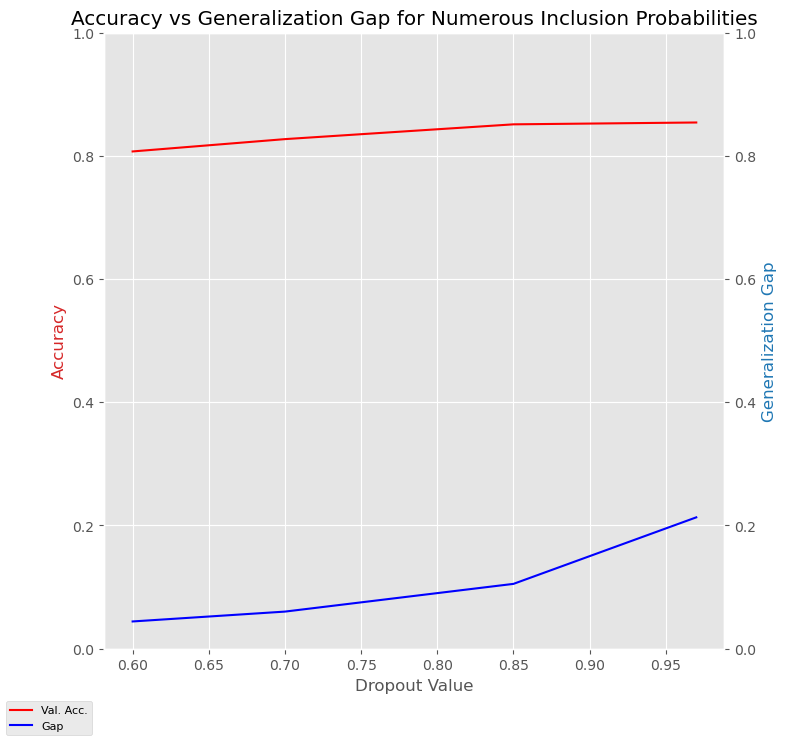

In [24]:
#Create Dropout Plots
dropout_values = np.array([0.6,0.7,0.85,0.97])
valid_acc_dropout = np.array([0.807,0.827,0.851,0.854])
train_error_dropout = np.array([0.549,0.452,0.329,0.244])
valid_error_dropout = np.array([0.593,0.512,0.434,0.457])

generalization_gap = valid_error_dropout - train_error_dropout
print(generalization_gap)

fig,ax1 = plt.subplots(figsize = (8,8))
ax1.set_xlabel('Dropout Value')
ax1.set_ylabel('Accuracy',color='tab:red')
ax1.set_ylim(bottom = 0,top =1)
ax1.plot(dropout_values,valid_acc_dropout,'red',label = 'Val. Acc.')

ax2 = ax1.twinx()
ax2.set_ylabel('Generalization Gap',color ='tab:blue')
ax2.set_ylim(bottom = 0,top =1)
ax2.plot(dropout_values,generalization_gap,'blue',label = 'Gap')

fig.legend(loc='lower left',fontsize = 8)
plt.title('Accuracy vs Generalization Gap for Numerous Inclusion Probabilities')
plt.savefig('acc_gap_dropout.svg',format='svg')
plt.show()

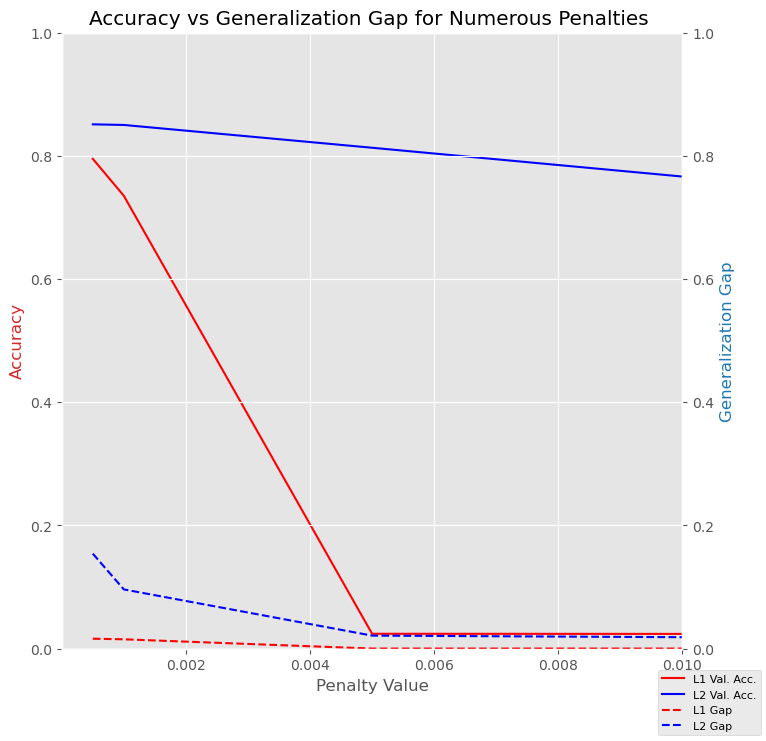

In [25]:
#Create L1L2 Plots
Penalty_values = np.array([0.0005,0.001,0.005,0.05])
valid_acc_l1 = np.array([0.795,0.735,0.024,0.022])
train_error_l1 = np.array([0.642,0.889,3.85,3.85])
valid_error_l1 = np.array([0.658,0.904,3.85,3.85])
valid_acc_l2 = np.array([0.851,0.85,0.813,0.392])
train_error_l2 = np.array([0.306,0.360,0.586,2.258])
valid_error_l2 = np.array([0.46,0.456,0.607,2.256])

generalization_gap_l1 = valid_error_l1 - train_error_l1
generalization_gap_l2 = valid_error_l2 - train_error_l2

fig,ax3 = plt.subplots(figsize = (8,8))
ax3.set_xlabel('Penalty Value')
ax3.set_xticks
ax3.set_xlim(left = 0.00001, right = 0.01)
ax3.set_ylabel('Accuracy',color='tab:red')
ax3.set_ylim(bottom = 0 , top = 1)
ax3.plot(Penalty_values,valid_acc_l1,'red',linestyle ='-',label = 'L1 Val. Acc.')
ax3.plot(Penalty_values,valid_acc_l2,'blue',linestyle ='-',label = 'L2 Val. Acc.')

ax4 = ax3.twinx()
ax4.set_ylabel('Generalization Gap',color ='tab:blue')
ax4.set_ylim(bottom = 0, top = 1)
ax4.plot(Penalty_values,generalization_gap_l1,'red',linestyle = '--',label = 'L1 Gap')
ax4.plot(Penalty_values,generalization_gap_l2,'blue',linestyle = '--',label = 'L2 Gap')

fig.legend(loc='lower right',fontsize = 8)
plt.title('Accuracy vs Generalization Gap for Numerous Penalties ')
plt.savefig('acc_gap_penalty.svg',format='svg')
plt.show()
